In [201]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


Getting the datasets as **train_data** and **test_data**

In [202]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\3442833501.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


In [203]:
print(train_data.shape)
print(test_data.shape)

(80000, 28)
(20000, 27)


In [204]:
train_data.head()



ID Customer_ID     Month               Name Age       Number  \
0   0x522a  CUS_0x2dbf       May  Abhishek Vishnoiw  51  370-51-2390   
1   0x6091  CUS_0x8167    August          Freifeldu  23  721-85-0529   
2   0xcb5f  CUS_0x3a0b  February                NaN  49  618-96-2558   
3  0x17dbc  CUS_0x9a4b     March  Alex Dobuzinskiso  40  817-31-4270   
4  0x225b3  CUS_0x253a      June                NaN  17  580-53-4920   

   Profession Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  ...  \
0    Musician     101583.48                   NaN                    5  ...   
1      Writer     101926.95             8635.9125                    4  ...   
2      Writer     158871.12                   NaN                    0  ...   
3      Doctor      60379.28                   NaN                    5  ...   
4  Accountant      50050.83             4085.9025                    9  ...   

   Credit_Mix  Current_Debt_Outstanding Ratio_Credit_Utilization  \
0    Standard                     50.93                34.462154   
1           _                      1058                39.693812   
2        Good                    576.48                39.367225   
3    Standard                    725.39                29.061701   
4         Bad                    3419.1                30.386321   

      Credit_History_Age  Payment_of_Min_Amount Per_Month_EMI  \
0  24 Years and 1 Months                     No    190.811017   
1  20 Years and 5 Months                     No     70.587681   
2  19 Years and 0 Months                     No     86.905860   
3  17 Years and 1 Months                     NM     90.906385   
4   4 Years and 6 Months                    Yes    190.445060   

   Monthly_Investment                 Payment_Behaviour     Monthly_Balance  \
0   630.0157894388726    Low_spent_Large_value_payments   314.0021934422197   
1   662.8039273360225   Low_spent_Medium_value_payments   410.1996419555151   
2   746.8059854204569   Low_spent_Medium_value_payments   742.5141542054829   
3  166.41865803064803  High_spent_Medium_value_payments  473.13562343490486   
4  56.789441169542684   High_spent_Large_value_payments   401.3557486786916   

  Credit_Score  
0     Standard  
1     Standard  
2     Standard  
3     Standard  
4         Poor  

[5 rows x 28 columns]

In [205]:
train_data[70:80]

ID Customer_ID     Month                    Name  Age       Number  \
70   0x8fef  CUS_0x76c1  February                Jessicaf  29_  763-06-9169   
71  0x1af0f  CUS_0x59b5      June                  Mirnat   37  906-67-2716   
72   0x187e  CUS_0x9ce6   January                     Ekr   42  101-11-3105   
73   0x4793  CUS_0xb80c      June      Olesya Dmitracovaa   22  933-92-6980   
74  0x20aa4  CUS_0xae98     March                   Cheev   44  021-36-7746   
75   0x28b9  CUS_0x791e     April                  Plumeq   41  667-96-7235   
76   0x9e16  CUS_0x1647   January  Caroline Valetkevitchb   19  747-79-7877   
77   0x8bac   CUS_0xb00     March            Alwyn Scotth   37  585-13-6101   
78  0x1f156  CUS_0x7767       May       Lesley Wroughtonu   15  768-01-1143   
79   0x9110  CUS_0x332c     March                     NaN   35  637-30-2918   

       Profession Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  \
70         Writer      66422.98                   NaN                    8   
71         Doctor      42877.62           3446.135000                    9   
72      Developer     123732.32          10416.026667                    4   
73      Scientist       27347.9           2499.991667                    8   
74       Musician      61127.37                   NaN                    8   
75       Musician      35518.98           3068.915000                    8   
76         Lawyer      28608.65           2490.054167                    4   
77         Writer    100284.24_           8288.020000                    5   
78       Musician      16559.75           1589.979167                    4   
79  Media_Manager      17693.62           1598.468333                    9   

    ...  Credit_Mix  Current_Debt_Outstanding Ratio_Credit_Utilization  \
70  ...    Standard                    153.99                26.491330   
71  ...         Bad                   2221.29                25.260302   
72  ...        Good                   1154.46                43.368065   
73  ...    Standard                   1274.89                38.142340   
74  ...    Standard                   1232.42                27.730034   
75  ...    Standard                   1270.18                26.339422   
76  ...        Good                    143.04                32.637900   
77  ...           _                    333.25                31.677084   
78  ...    Standard                   1716.01                31.166125   
79  ...    Standard                   2476.23                28.386357   

        Credit_History_Age  Payment_of_Min_Amount Per_Month_EMI  \
70  10 Years and 11 Months                    Yes    280.927551   
71   19 Years and 4 Months                    Yes     61.874965   
72   27 Years and 3 Months                     No      0.000000   
73   12 Years and 8 Months                    Yes     13.306163   
74    6 Years and 0 Months                     NM     92.476159   
75   11 Years and 1 Months                    Yes     84.755343   
76   17 Years and 1 Months                     No     23.008446   
77   30 Years and 3 Months                    Yes    148.351807   
78   10 Years and 5 Months                    Yes     31.924590   
79   10 Years and 5 Months                    Yes     20.003248   

    Monthly_Investment                 Payment_Behaviour     Monthly_Balance  \
70  325.65391359886377    Low_spent_Small_value_payments  222.04336909658485   
71   268.2228289599029                            !@9#%8         294.5157059   
72                 NaN  High_spent_Medium_value_payments   940.3944827695151   
73  103.74972268835941  High_spent_Medium_value_payments  382.94328144505187   
74           __10000__   High_spent_Large_value_payments   585.8028016933412   
75   71.66524399644268   High_spent_Large_value_payments  390.47091293917435   
76  102.56976416077156    Low_spent_Small_value_payments   413.4272063706799   
77  163.11439269360952   High_spent_Large_value_payments   757.3358002972583   
78  117

In [206]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         8029
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Loan_Type                    9157
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                    0
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
dtype: int64
ID                             0
Cu

In [207]:
print(train_data.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
Number                       object
Profession                   object
Income_Annual                object
Base_Salary_PerMonth        float64
Total_Bank_Accounts           int64
Total_Credit_Cards            int64
Rate_Of_Interest              int64
Total_Current_Loans          object
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments       object
Credit_Limit                 object
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding     object
Ratio_Credit_Utilization    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment           object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

# Correcting numbers of format "_ _num_ _"


In [208]:
#train_data['Age'] = train_data['Age'].str.replace('_', '')
Cols_with_underscores = ['Age','Income_Annual','Total_Current_Loans','Total_Delayed_Payments','Credit_Limit','Credit_Mix','Current_Debt_Outstanding','Monthly_Investment','Monthly_Balance']
# Replace underscores at the beginning or end of values in a specified column
for col in Cols_with_underscores:
    train_data[col] = train_data[col].str.replace('_','')
    test_data[col] = test_data[col].str.replace('_','')


In [209]:
print(train_data.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
Number                       object
Profession                   object
Income_Annual                object
Base_Salary_PerMonth        float64
Total_Bank_Accounts           int64
Total_Credit_Cards            int64
Rate_Of_Interest              int64
Total_Current_Loans          object
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments       object
Credit_Limit                 object
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding     object
Ratio_Credit_Utilization    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment           object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [210]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         8029
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Loan_Type                    9157
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                    0
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance             15246
Credit_Score                    0
dtype: int64
ID                             0
Cu

Converting the **Object** types to **numerical** wherever necessary

In [211]:
# Convert columns to numeric where applicable
numeric_columns = ['Age','Income_Annual','Total_Current_Loans','Total_Delayed_Payments','Credit_Limit','Current_Debt_Outstanding','Monthly_Investment','Monthly_Balance']
#numeric_columns = [ 'Age', 'Income_Annual', 'Total_Current_Loans', 'Credit_Limit', 'Current_Debt_Outstanding']
for col in numeric_columns:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
    # X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Encode categorical testlumns
#categorical_columns = ['Profession', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
#train_data = pd.get_dummies(traindata, columns=categorical_columns, drop_first=True)
# X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

Plotting the Missing data Heatmap


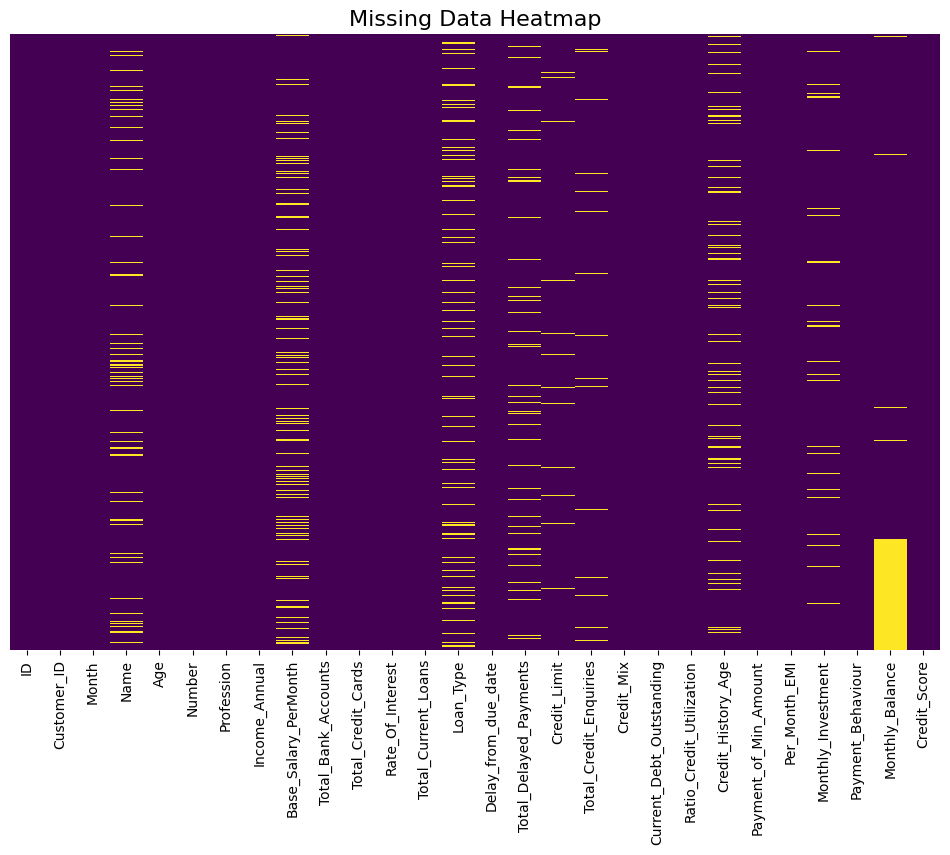

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap function to visualize missing values
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Set the title for the plot
plt.title('Missing Data Heatmap', fontsize=16)
plt.show()


Filling the null values with median in the columns:
* 'Income_Annual'
* 'Total_Delayed_Payments'
* 'Monthly_Investment'
* 'Monthly_Balance'
* 'Total_Credit_Enquiries',
* 'Credit_Limit'
* 'Base_Salary_PerMonth'


In [213]:
# Fill any remaining NaN values in numeric columns with mean or median
numeric_columns2 = ['Income_Annual','Total_Delayed_Payments','Monthly_Investment','Monthly_Balance','Total_Credit_Enquiries','Credit_Limit','Base_Salary_PerMonth']
for col in numeric_columns2:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)
    # X_test[col].fillna(X_test[col].median(), inplace=True)


C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\4246562809.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\4246562809.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Replacing -100 values in **Total_Current_Loans** with 0

In [214]:
# coorect the -100 in total_current_loans with 0
train_data['Total_Current_Loans'] = train_data['Total_Current_Loans'].replace(-100, 0)
test_data['Total_Current_Loans'] = test_data['Total_Current_Loans'].replace(-100, 0)

In [215]:
train_data['Total_Current_Loans'].head(15)

0     4
1     1
2     1
3     3
4     5
5     3
6     3
7     3
8     1
9     9
10    3
11    0
12    0
13    4
14    9
Name: Total_Current_Loans, dtype: int64

In [216]:
print(train_data.shape, end="\n\n")
print(train_data.isnull().sum())

(80000, 28)

ID                             0
Customer_ID                    0
Month                          0
Name                        8029
Age                            0
Number                         0
Profession                     0
Income_Annual                  0
Base_Salary_PerMonth           0
Total_Bank_Accounts            0
Total_Credit_Cards             0
Rate_Of_Interest               0
Total_Current_Loans            0
Loan_Type                   9157
Delay_from_due_date            0
Total_Delayed_Payments         0
Credit_Limit                   0
Total_Credit_Enquiries         0
Credit_Mix                     0
Current_Debt_Outstanding       0
Ratio_Credit_Utilization       0
Credit_History_Age          7240
Payment_of_Min_Amount          0
Per_Month_EMI                  0
Monthly_Investment             0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64


In [217]:
print(test_data.isnull().sum())

ID                             0
Customer_ID                    0
Month                          0
Name                        1956
Age                            0
Number                         0
Profession                     0
Income_Annual                  0
Base_Salary_PerMonth           0
Total_Bank_Accounts            0
Total_Credit_Cards             0
Rate_Of_Interest               0
Total_Current_Loans            0
Loan_Type                   2251
Delay_from_due_date            0
Total_Delayed_Payments         0
Credit_Limit                   0
Total_Credit_Enquiries         0
Credit_Mix                     0
Current_Debt_Outstanding       0
Ratio_Credit_Utilization       0
Credit_History_Age          1790
Payment_of_Min_Amount          0
Per_Month_EMI                  0
Monthly_Investment             0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64


# Graph PLots


In [218]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71971 non-null  object 
 4   Age                       80000 non-null  int64  
 5   Number                    80000 non-null  object 
 6   Profession                80000 non-null  object 
 7   Income_Annual             80000 non-null  float64
 8   Base_Salary_PerMonth      80000 non-null  float64
 9   Total_Bank_Accounts       80000 non-null  int64  
 10  Total_Credit_Cards        80000 non-null  int64  
 11  Rate_Of_Interest          80000 non-null  int64  
 12  Total_Current_Loans       80000 non-null  int64  
 13  Loan_Type                 70843 non-null  object 
 14  Delay_

In [219]:
train_data.head()

ID Customer_ID     Month               Name  Age       Number  \
0   0x522a  CUS_0x2dbf       May  Abhishek Vishnoiw   51  370-51-2390   
1   0x6091  CUS_0x8167    August          Freifeldu   23  721-85-0529   
2   0xcb5f  CUS_0x3a0b  February                NaN   49  618-96-2558   
3  0x17dbc  CUS_0x9a4b     March  Alex Dobuzinskiso   40  817-31-4270   
4  0x225b3  CUS_0x253a      June                NaN   17  580-53-4920   

   Profession  Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  ...  \
0    Musician      101583.48           3086.683333                    5  ...   
1      Writer      101926.95           8635.912500                    4  ...   
2      Writer      158871.12           3086.683333                    0  ...   
3      Doctor       60379.28           3086.683333                    5  ...   
4  Accountant       50050.83           4085.902500                    9  ...   

   Credit_Mix  Current_Debt_Outstanding  Ratio_Credit_Utilization  \
0    Standard                     50.93                 34.462154   
1                               1058.00                 39.693812   
2        Good                    576.48                 39.367225   
3    Standard                    725.39                 29.061701   
4         Bad                   3419.10                 30.386321   

      Credit_History_Age  Payment_of_Min_Amount  Per_Month_EMI  \
0  24 Years and 1 Months                     No     190.811017   
1  20 Years and 5 Months                     No      70.587681   
2  19 Years and 0 Months                     No      86.905860   
3  17 Years and 1 Months                     NM      90.906385   
4   4 Years and 6 Months                    Yes     190.445060   

   Monthly_Investment                 Payment_Behaviour Monthly_Balance  \
0          630.015789    Low_spent_Large_value_payments      314.002193   
1          662.803927   Low_spent_Medium_value_payments      410.199642   
2          746.805985   Low_spent_Medium_value_payments      742.514154   
3          166.418658  High_spent_Medium_value_payments      473.135623   
4           56.789441   High_spent_Large_value_payments      401.355749   

   Credit_Score  
0      Standard  
1      Standard  
2      Standard  
3      Standard  
4          Poor  

[5 rows x 28 columns]

# Let's try to remove the outlier values in the data:

In [220]:
class outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5

	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

In [221]:
print(train_data['Age'].describe())
print("<----------------------------------------->")
print(train_data['Base_Salary_PerMonth'].describe())
print("<----------------------------------------->")
print(train_data['Total_Bank_Accounts'].describe())
print("<----------------------------------------->")
print(train_data['Total_Credit_Cards'].describe())
print("<----------------------------------------->")
print(train_data['Credit_Limit'].describe())
print("<----------------------------------------->")
print(train_data['Monthly_Balance'].describe())
print("<----------------------------------------->")
print(train_data['Income_Annual'].describe())
print("<----------------------------------------->")
print(train_data['Current_Debt_Outstanding'].describe())
print("<----------------------------------------->")
print(train_data['Per_Month_EMI'].describe())

count    80000.000000
mean       110.735475
std        687.553603
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64
<----------------------------------------->
count    80000.000000
mean      4023.391184
std       2958.751989
min        303.645417
25%       1790.985000
50%       3086.683333
75%       5365.567500
max      15204.633333
Name: Base_Salary_PerMonth, dtype: float64
<----------------------------------------->
count    80000.000000
mean        17.046287
std        116.953761
min         -1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Total_Bank_Accounts, dtype: float64
<----------------------------------------->
count    80000.000000
mean        22.175438
std        128.083595
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Total_Credit_Cards, dtype: float64
<-----------

### Distribution Plots for Univariate Analysis

we will do distribution plots (histograms) For columns like

*   Age
*    Income_Annual
*   Base_Salary_PerMonth
*   Total_Bank_Accounts
*   Total_Credit_Cards
*    Credit_Limit
*    Monthly_Balance

and box plots for detecting outliers in numerical columns like

*   Income_Annual
*   Credit_Debt_Outstanding
*   Monthly Investment
*   Per_Month_EMI




  

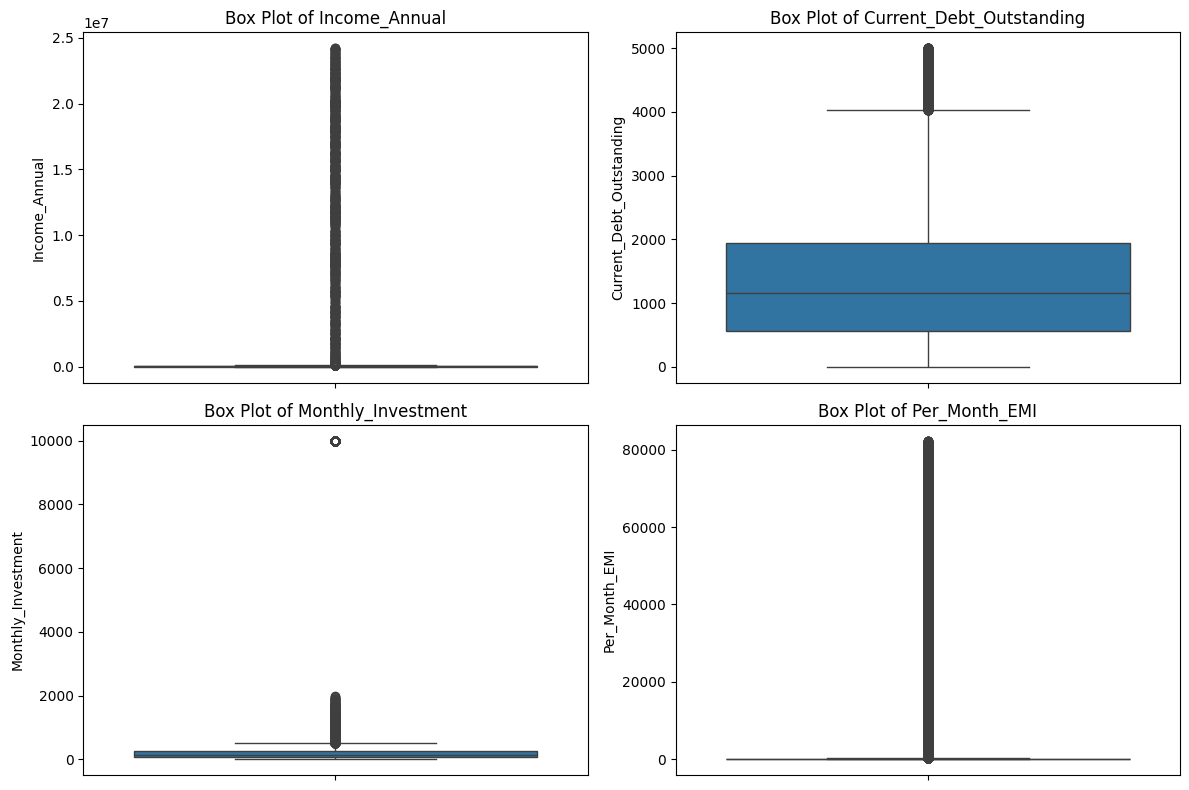

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the box plots
sns.boxplot(y=train_data['Income_Annual'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Income_Annual')

sns.boxplot(y=train_data['Current_Debt_Outstanding'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Current_Debt_Outstanding')

sns.boxplot(y=train_data['Monthly_Investment'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Monthly_Investment')

sns.boxplot(y=train_data['Per_Month_EMI'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Per_Month_EMI')

plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

now we will remove outliers and try box plot again:

In [223]:
remover1 = outlierremoval(train_data["Age"])
train_data["Age"]=train_data["Age"].apply(remover1.remove)

remover2 = outlierremoval(train_data["Base_Salary_PerMonth"])
train_data["Base_Salary_PerMonth"]=train_data["Base_Salary_PerMonth"].apply(remover2.remove)

remover3 = outlierremoval(train_data["Total_Bank_Accounts"])
train_data["Total_Bank_Accounts"]=train_data["Total_Bank_Accounts"].apply(remover3.remove)

remover4 = outlierremoval(train_data["Total_Credit_Cards"])
train_data["Total_Credit_Cards"]=train_data["Total_Credit_Cards"].apply(remover4.remove)

remover5 = outlierremoval(train_data["Credit_Limit"])
train_data["Credit_Limit"]=train_data["Credit_Limit"].apply(remover5.remove)

remover6 = outlierremoval(train_data["Monthly_Balance"])
train_data["Monthly_Balance"]=train_data["Monthly_Balance"].apply(remover6.remove)

remover7 = outlierremoval(train_data["Income_Annual"])
train_data["Income_Annual"]=train_data["Income_Annual"].apply(remover7.remove)

remover8 = outlierremoval(train_data["Current_Debt_Outstanding"])
train_data["Current_Debt_Outstanding"]=train_data["Current_Debt_Outstanding"].apply(remover8.remove)

remover9 = outlierremoval(train_data["Per_Month_EMI"])
train_data["Per_Month_EMI"]=train_data["Per_Month_EMI"].apply(remover9.remove)

remover9 = outlierremoval(train_data["Monthly_Investment"])
train_data["Monthly_Investment"]=train_data["Monthly_Investment"].apply(remover9.remove)



trying box plot after removing outliers:

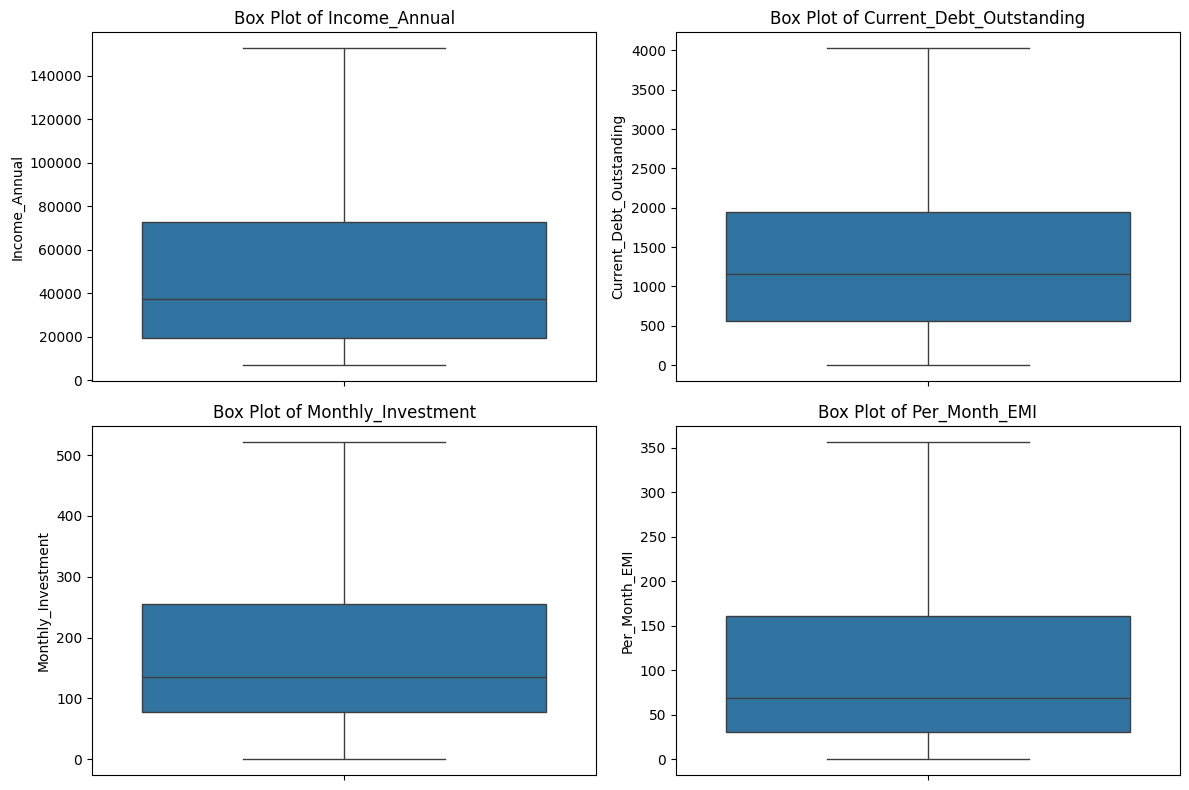

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the box plots
sns.boxplot(y=train_data['Income_Annual'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Income_Annual')

sns.boxplot(y=train_data['Current_Debt_Outstanding'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Current_Debt_Outstanding')

sns.boxplot(y=train_data['Monthly_Investment'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Monthly_Investment')

sns.boxplot(y=train_data['Per_Month_EMI'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Per_Month_EMI')

plt.tight_layout()
plt.savefig('outliers_removed.png')
plt.show()

C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\2206404685.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Score', y='Age', data=train_data, palette='Set2')


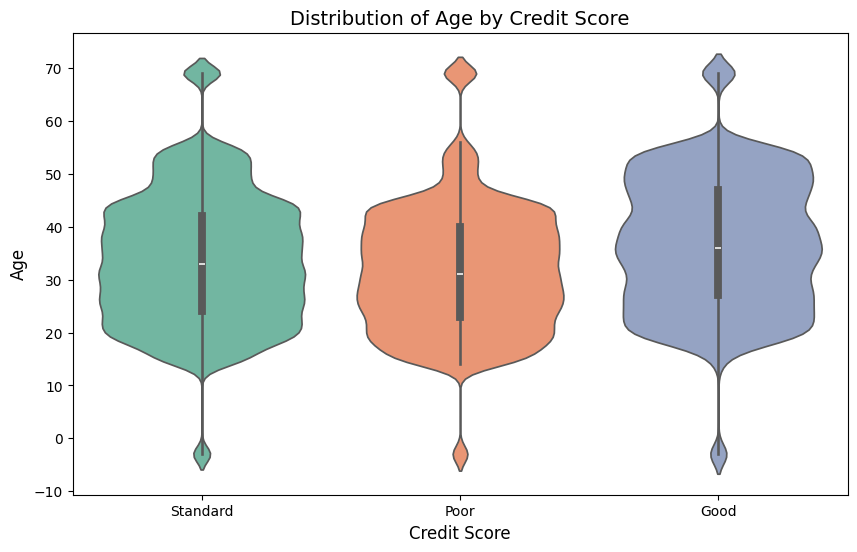

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df

plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Age', data=train_data, palette='Set2')

# Set titles and labels
plt.title('Distribution of Age by Credit Score', fontsize=14)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.savefig("AgeDistbyCredit.png")
plt.show()


Scatter Plot for: <br>
 **Scatter Plots:** Age vs. Income_Annual or Age vs. Monthly Balance to identify potential trends with age.<br>

**Current Debt Outstanding vs. Credit Limit** to see if higher credit limits lead to higher outstanding debt.

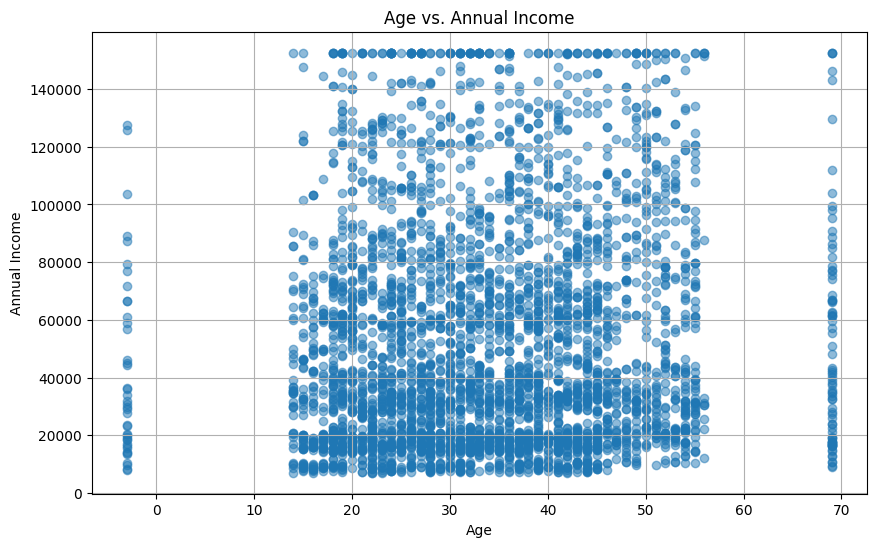

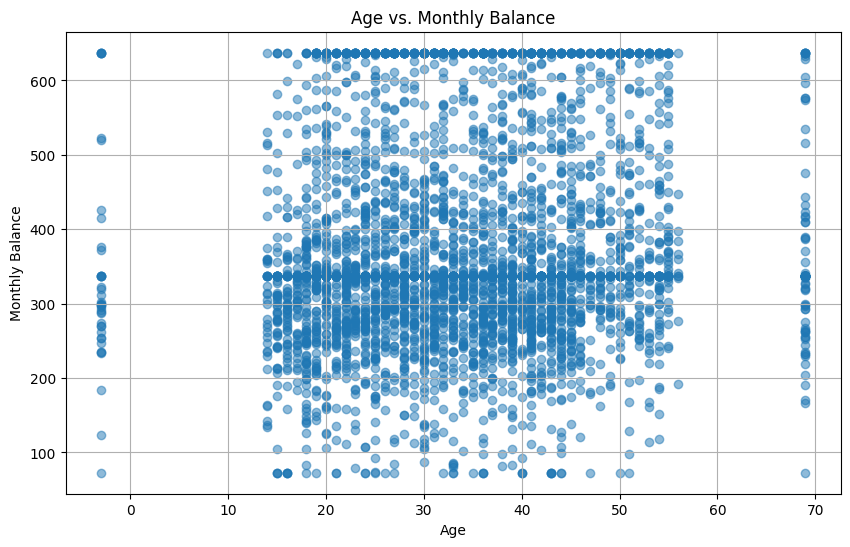

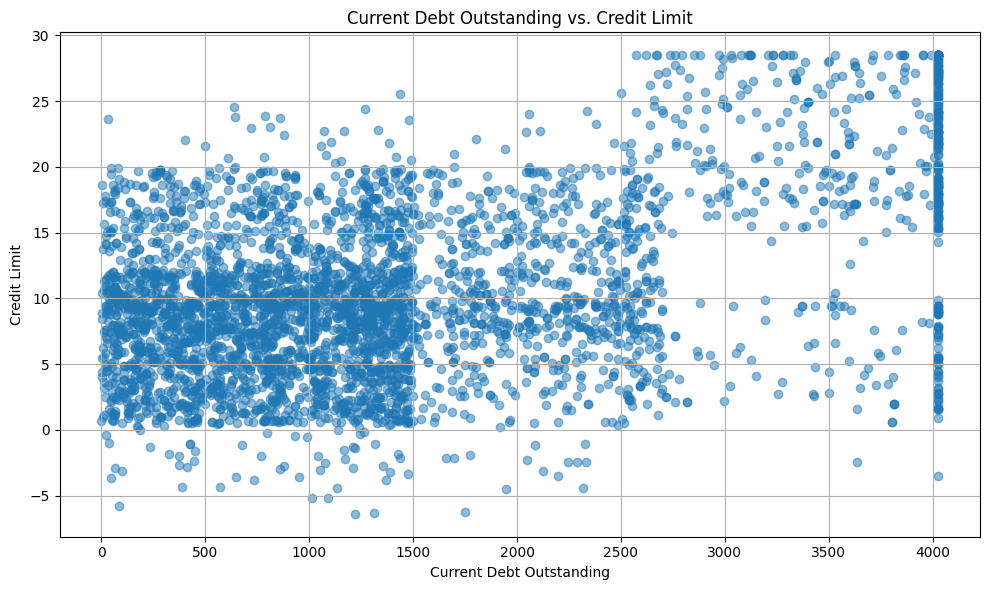

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# sample_size = 8000
# sample_data = train_data.sample(n=sample_size, random_state=42)
# Decimation factor (adjust as needed)
decimation_factor = 20
sample_data = train_data.iloc[::decimation_factor]

# Scatter plot: Age vs. Income_Annual
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Age'], sample_data['Income_Annual'], alpha=0.5)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
# plt.show()

# Scatter plot: Age vs. Monthly Balance
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Age'], sample_data['Monthly_Balance'], alpha=0.5)
plt.title('Age vs. Monthly Balance')
plt.xlabel('Age')
plt.ylabel('Monthly Balance')
plt.grid(True)
# plt.show()

# Scatter plot: Current Debt Outstanding vs. Credit Limit
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Current_Debt_Outstanding'], sample_data['Credit_Limit'], alpha=0.5)
plt.title('Current Debt Outstanding vs. Credit Limit')
plt.xlabel('Current Debt Outstanding')
plt.ylabel('Credit Limit')
plt.grid(True)
plt.savefig('scatter.png')
plt.tight_layout()
plt.show()

In [227]:
train_data.head()

ID Customer_ID     Month               Name   Age       Number  \
0   0x522a  CUS_0x2dbf       May  Abhishek Vishnoiw  51.0  370-51-2390   
1   0x6091  CUS_0x8167    August          Freifeldu  23.0  721-85-0529   
2   0xcb5f  CUS_0x3a0b  February                NaN  49.0  618-96-2558   
3  0x17dbc  CUS_0x9a4b     March  Alex Dobuzinskiso  40.0  817-31-4270   
4  0x225b3  CUS_0x253a      June                NaN  17.0  580-53-4920   

   Profession  Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  ...  \
0    Musician    101583.4800           3086.683333                  5.0  ...   
1      Writer    101926.9500           8635.912500                  4.0  ...   
2      Writer    152567.0375           3086.683333                  0.0  ...   
3      Doctor     60379.2800           3086.683333                  5.0  ...   
4  Accountant     50050.8300           4085.902500                  9.0  ...   

   Credit_Mix  Current_Debt_Outstanding  Ratio_Credit_Utilization  \
0    Standard                     50.93                 34.462154   
1                               1058.00                 39.693812   
2        Good                    576.48                 39.367225   
3    Standard                    725.39                 29.061701   
4         Bad                   3419.10                 30.386321   

      Credit_History_Age  Payment_of_Min_Amount  Per_Month_EMI  \
0  24 Years and 1 Months                     No     190.811017   
1  20 Years and 5 Months                     No      70.587681   
2  19 Years and 0 Months                     No      86.905860   
3  17 Years and 1 Months                     NM      90.906385   
4   4 Years and 6 Months                    Yes     190.445060   

   Monthly_Investment                 Payment_Behaviour Monthly_Balance  \
0          521.203251    Low_spent_Large_value_payments      314.002193   
1          521.203251   Low_spent_Medium_value_payments      410.199642   
2          521.203251   Low_spent_Medium_value_payments      637.196538   
3          166.418658  High_spent_Medium_value_payments      473.135623   
4           56.789441   High_spent_Large_value_payments      401.355749   

   Credit_Score  
0      Standard  
1      Standard  
2      Standard  
3      Standard  
4          Poor  

[5 rows x 28 columns]

### Statistical Info about the numerical columns

In [228]:
#get the statistical info about the Income_Annual
for col in ['Age', 'Income_Annual', 'Base_Salary_PerMonth', 'Total_Bank_Accounts',
                   'Total_Credit_Cards', 'Credit_Limit', 'Monthly_Balance']:
                   print(col)
                   print(train_data[col].describe())
#print(train_data['Income_Annual'].)

Age
count    80000.000000
mean        33.663350
std         12.173506
min         -3.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         69.000000
Name: Age, dtype: float64
Income_Annual
count     80000.000000
mean      51148.477245
std       38629.739154
min        7005.930000
25%       19419.650000
50%       37482.370000
75%       72678.605000
max      152567.037500
Name: Income_Annual, dtype: float64
Base_Salary_PerMonth
count    80000.000000
mean      3951.137397
std       2754.899047
min        303.645417
25%       1790.985000
50%       3086.683333
75%       5365.567500
max      10727.441250
Name: Base_Salary_PerMonth, dtype: float64
Total_Bank_Accounts
count    80000.000000
mean         5.451819
std          2.669052
min         -0.500000
25%          4.000000
50%          6.000000
75%          7.000000
max         11.500000
Name: Total_Bank_Accounts, dtype: float64
Total_Credit_Cards
count    80000.000000
mean         5.663250
std          2.2267

In [229]:
count = train_data[train_data['Total_Credit_Cards'] > 1495].shape[0]
print(count)

0


## Univariate data Analysis

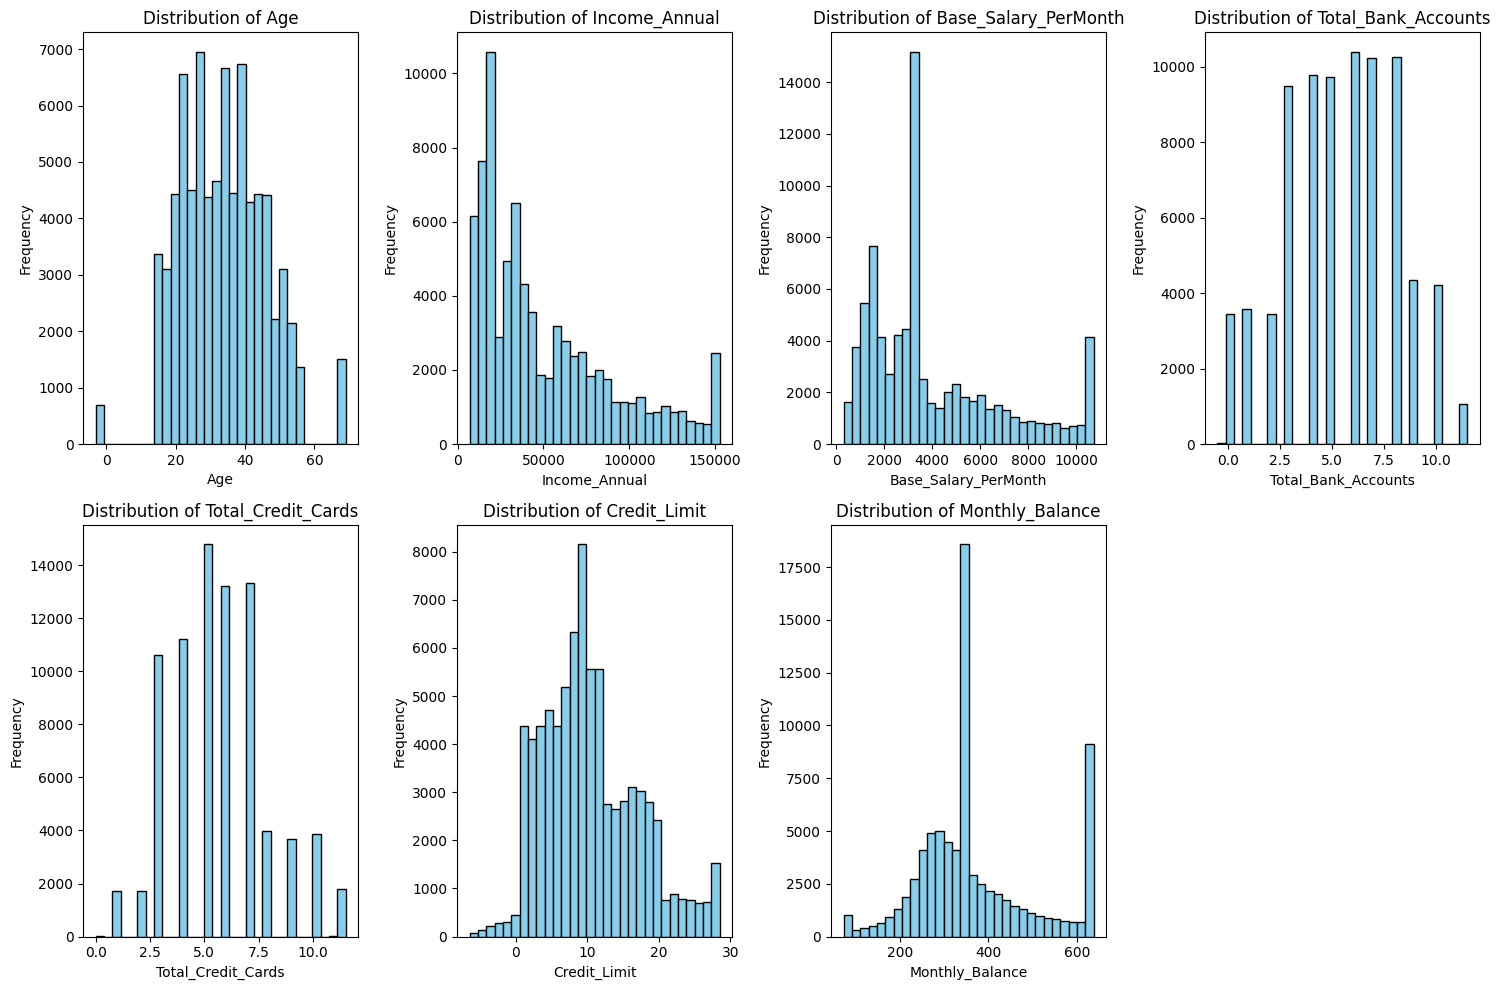

In [230]:
import matplotlib.pyplot as plt

# Define the columns you want to plot histograms for
columns_to_plot = ['Age', 'Income_Annual', 'Base_Salary_PerMonth', 'Total_Bank_Accounts',
                   'Total_Credit_Cards', 'Credit_Limit', 'Monthly_Balance']

# Set the size of the entire plot grid
plt.figure(figsize=(15, 10))

# Loop through each column and create a histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)  # Adjust the grid size based on the number of columns
    plt.hist(train_data[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


    '''elif column == 'Total_Bank_Accounts':
        plt.xlim(0, 20)'''

# Adjust layout and display the plot and save as png
plt.savefig('histograms.png')
plt.tight_layout()
plt.show()


### Categorical Count Plots
This is for columns such as Profession, Loan_Type, Credit_Mix

In [231]:
# Get the unique values in the 'Credit_Mix' column
unique_values_creditmix = train_data['Credit_Mix'].unique()
# Print the unique values
print(unique_values_creditmix)

train_data['Credit_Mix'] = train_data['Credit_Mix'].replace('', 'unspecified')

# Print the unique values after replacement
print(train_data['Credit_Mix'].unique())



# Get the unique values in the 'Credit_Mix' column
unique_values_creditmix2 = test_data['Credit_Mix'].unique()
# Print the unique values
print(unique_values_creditmix2)

test_data['Credit_Mix'] = test_data['Credit_Mix'].replace('', 'unspecified')

# Print the unique values after replacement
print(test_data['Credit_Mix'].unique())

['Standard' '' 'Good' 'Bad']
['Standard' 'unspecified' 'Good' 'Bad']
['Bad' '' 'Good' 'Standard']
['Bad' 'unspecified' 'Good' 'Standard']


Some more data value modifications

In [232]:
# Get the unique values in the 'Profession' column
unique_values_profession = train_data['Profession'].unique()
# Print the unique values
print(unique_values_profession)

train_data['Profession'] = train_data['Profession'].replace('_______', 'unspecified')

# Print the unique values after replacement
print(train_data['Profession'].unique())


# Get the unique values in the 'Profession' column
unique_values_profession2 = test_data['Profession'].unique()
# Print the unique values
print(unique_values_profession2)

test_data['Profession'] = test_data['Profession'].replace('_______', 'unspecified')

# Print the unique values after replacement
print(test_data['Profession'].unique())

['Musician' 'Writer' 'Doctor' 'Accountant' '_______' 'Engineer' 'Manager'
 'Media_Manager' 'Teacher' 'Developer' 'Architect' 'Mechanic' 'Lawyer'
 'Entrepreneur' 'Scientist' 'Journalist']
['Musician' 'Writer' 'Doctor' 'Accountant' 'unspecified' 'Engineer'
 'Manager' 'Media_Manager' 'Teacher' 'Developer' 'Architect' 'Mechanic'
 'Lawyer' 'Entrepreneur' 'Scientist' 'Journalist']
['Mechanic' 'Developer' 'Entrepreneur' 'Architect' 'Teacher' 'Writer'
 '_______' 'Journalist' 'Scientist' 'Doctor' 'Musician' 'Lawyer'
 'Engineer' 'Accountant' 'Media_Manager' 'Manager']
['Mechanic' 'Developer' 'Entrepreneur' 'Architect' 'Teacher' 'Writer'
 'unspecified' 'Journalist' 'Scientist' 'Doctor' 'Musician' 'Lawyer'
 'Engineer' 'Accountant' 'Media_Manager' 'Manager']


C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\809286537.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")  # Right align
C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\809286537.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")  # Right align


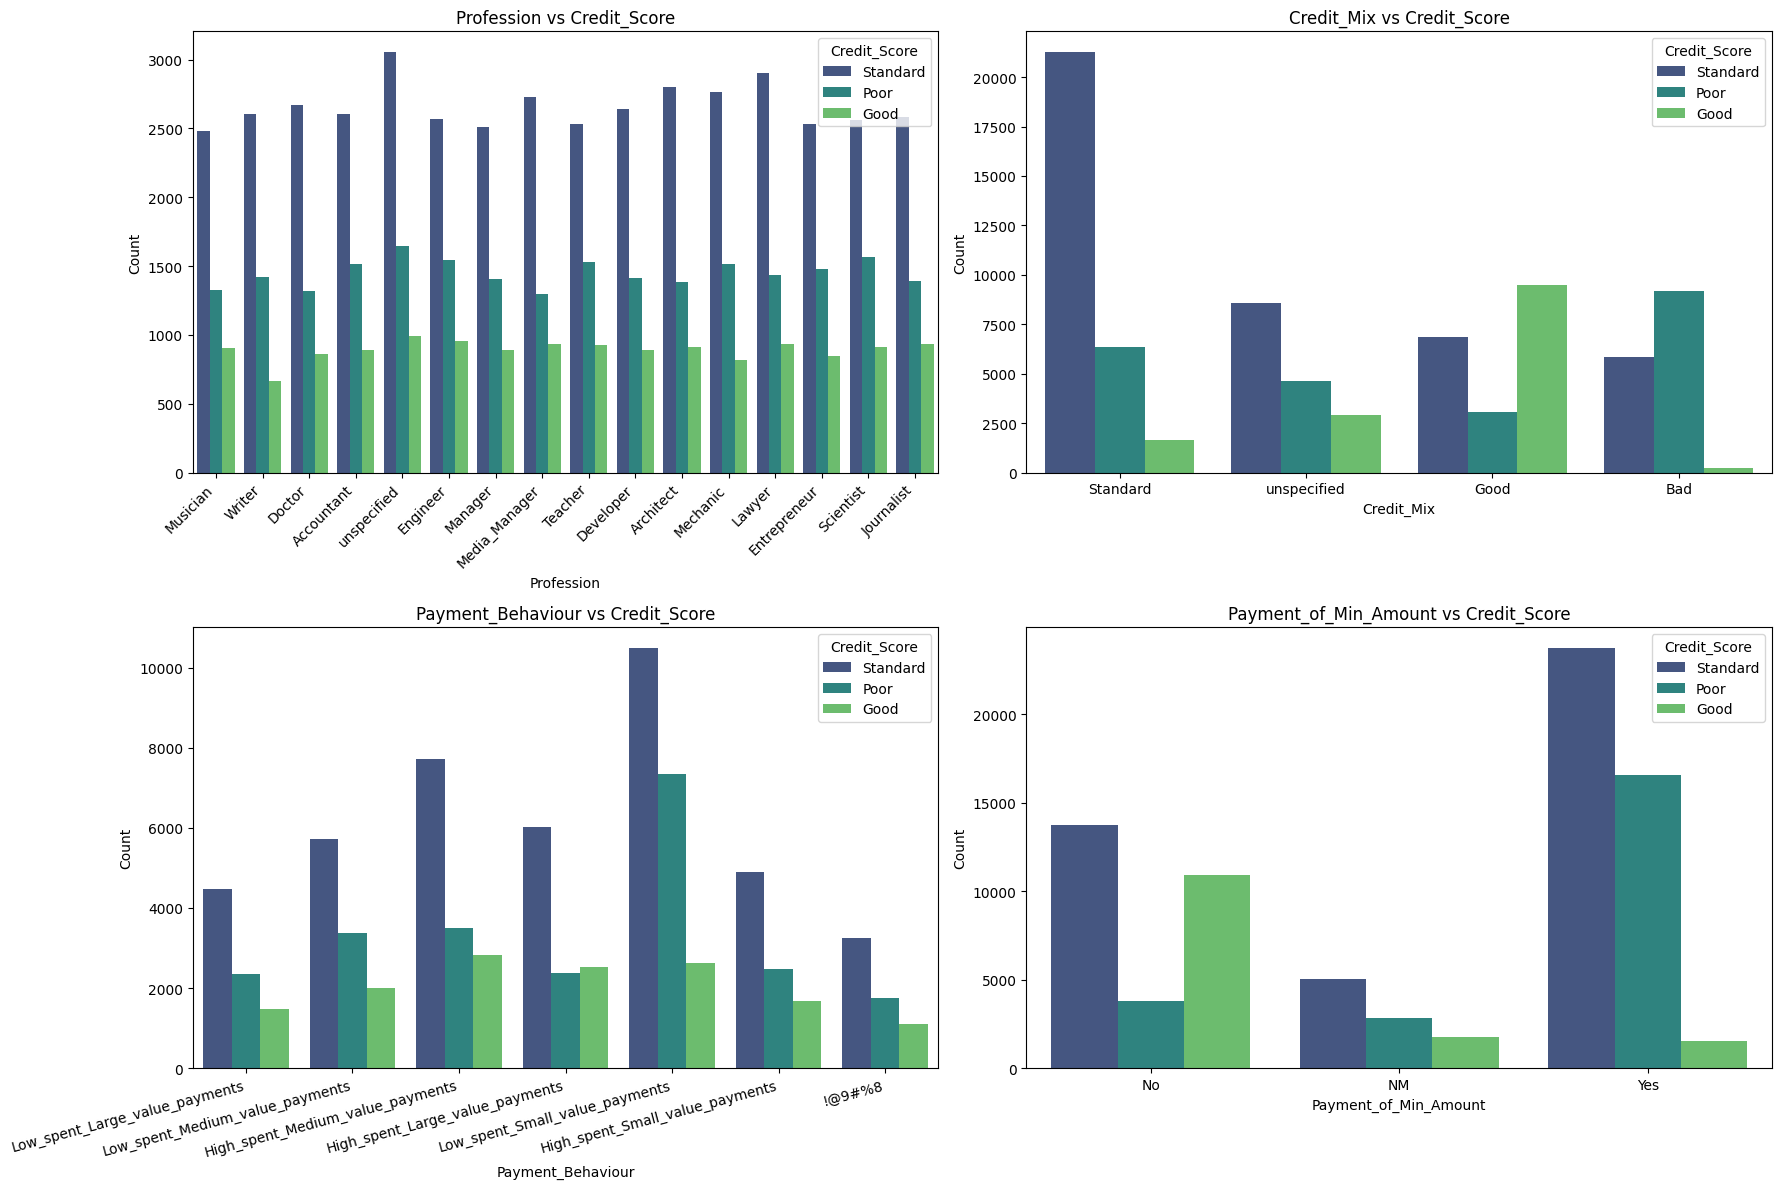

In [233]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical columns to plot against Credit_Score
categorical_columns = ['Profession', 'Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']
# Later also include 'loan_type'

# Set the size of the plot grid
plt.figure(figsize=(18, 12))

# Loop through each categorical column to create count plots
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Adjust grid based on number of columns

    # Address overlapping profession names
    if column == 'Profession':
        # Get rotation angle based on number of categories (adjust as needed)
        num_categories = len(train_data[column].unique())
        # rotation = int(90 / (num_categories - 1))  # More categories, higher rotation
        rotation = int(45)  # More categories, higher rotation
        ax = sns.countplot(data=train_data, x=column, hue='Credit_Score', palette='viridis')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")  # Right align

    elif column == 'Payment_Behaviour':
        # Get rotation angle based on number of categories (adjust as needed)
        num_categories = len(train_data[column].unique())
        rotation = int(90 / (num_categories - 1))  # More categories, higher rotation
        ax = sns.countplot(data=train_data, x=column, hue='Credit_Score', palette='viridis')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")  # Right align
    else:
        sns.countplot(data=train_data, x=column, hue='Credit_Score', palette='viridis')

    plt.title(f'{column} vs Credit_Score')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Credit_Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [234]:
print(train_data.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
Number                       object
Profession                   object
Income_Annual               float64
Base_Salary_PerMonth        float64
Total_Bank_Accounts         float64
Total_Credit_Cards          float64
Rate_Of_Interest              int64
Total_Current_Loans           int64
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments      float64
Credit_Limit                float64
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding    float64
Ratio_Credit_Utilization    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment          float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [235]:
train_data['Payment_of_Min_Amount'].head(10)

0     No
1     No
2     No
3     NM
4    Yes
5     No
6    Yes
7     No
8    Yes
9    Yes
Name: Payment_of_Min_Amount, dtype: object

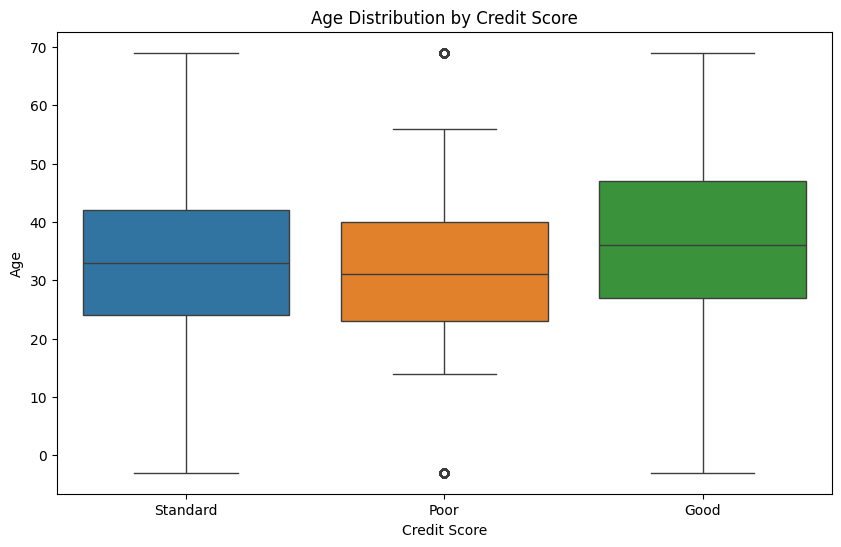

In [236]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create box plots for each credit score category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Age', data=train_data, hue='Credit_Score')
plt.title('Age Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

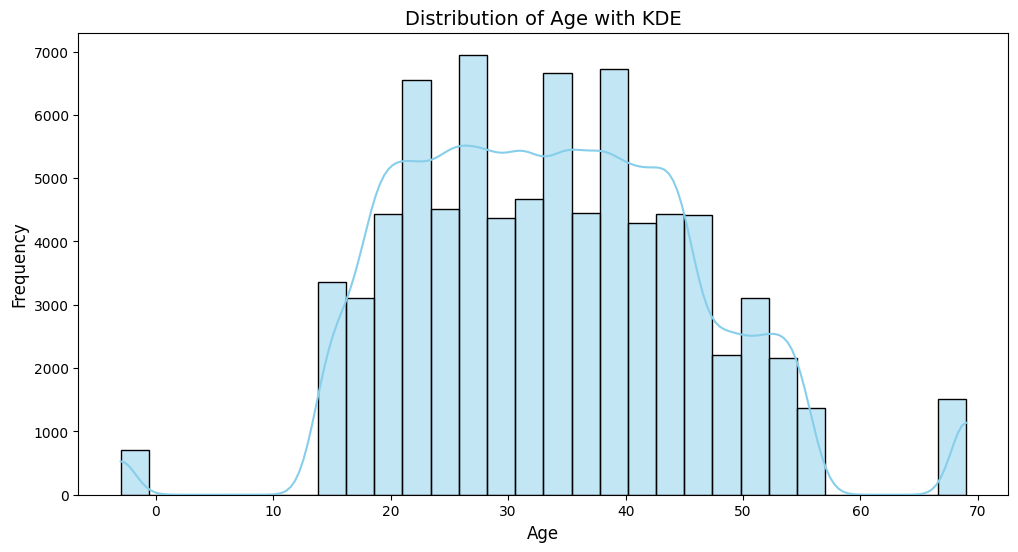

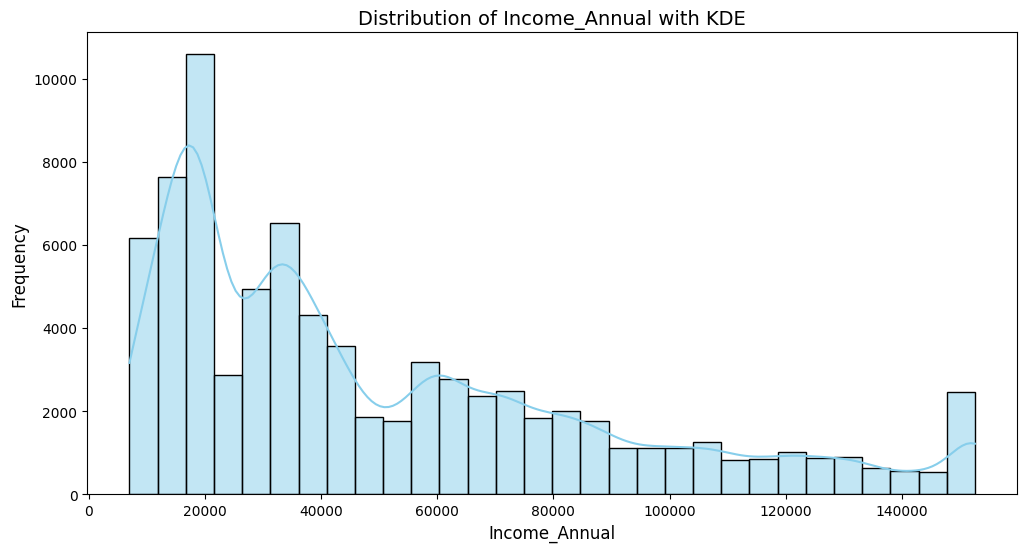

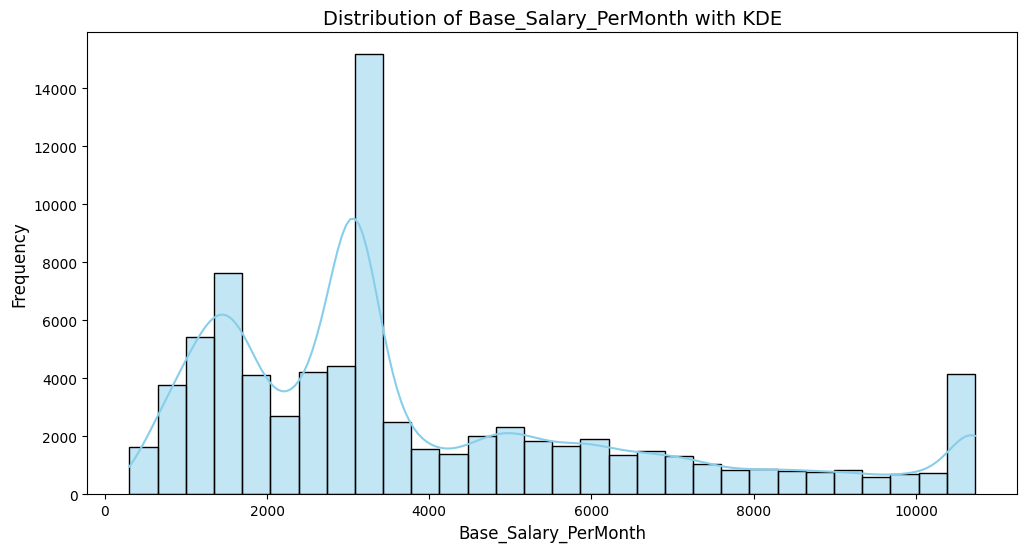

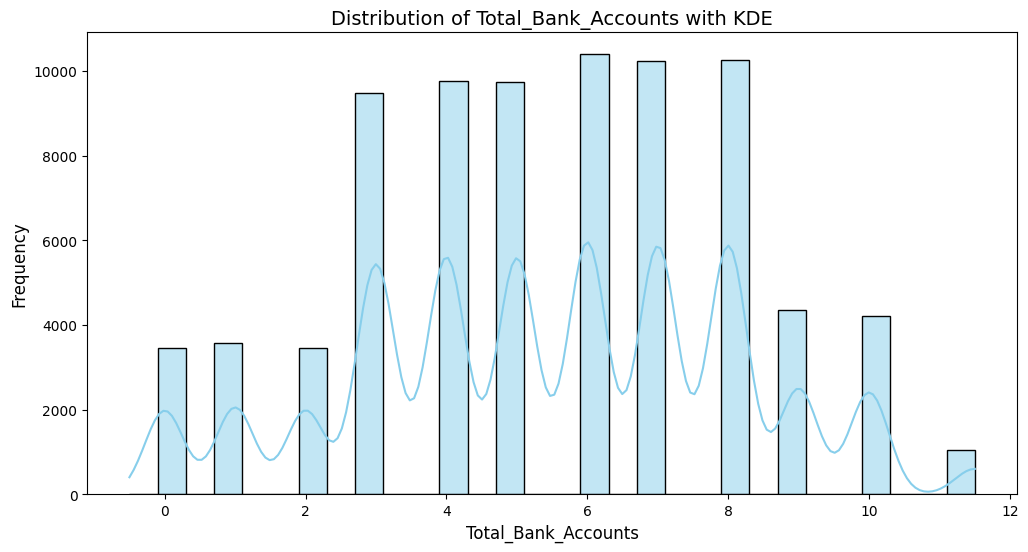

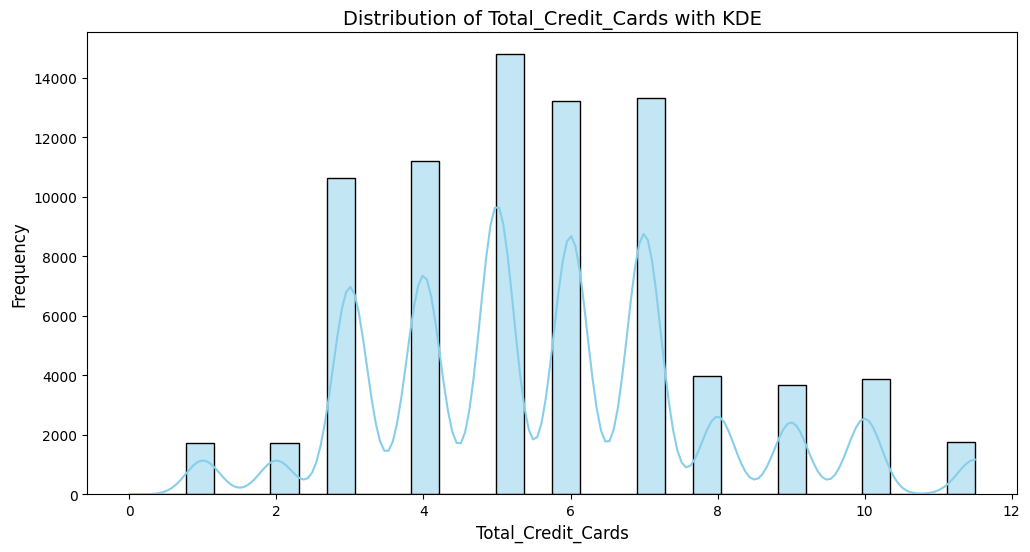

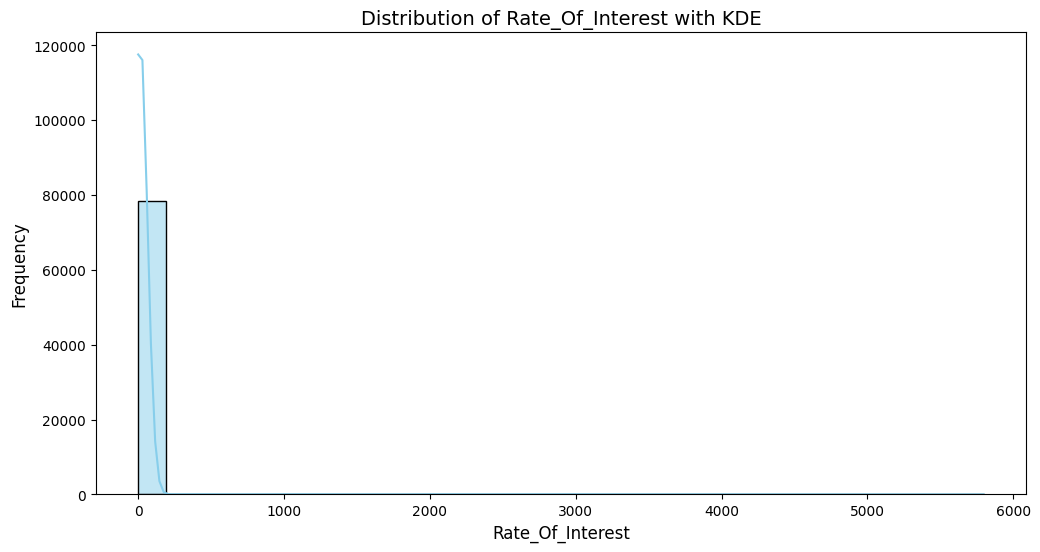

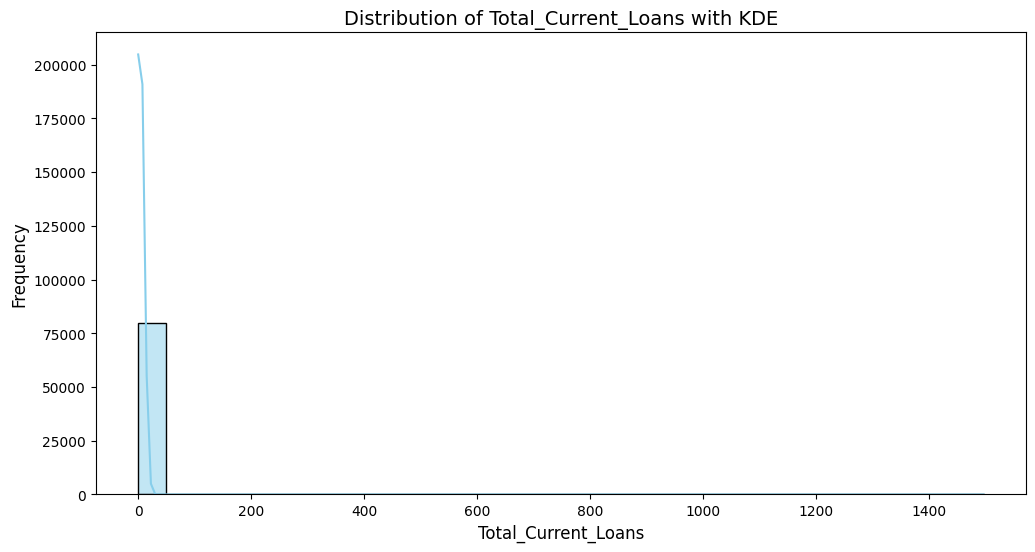

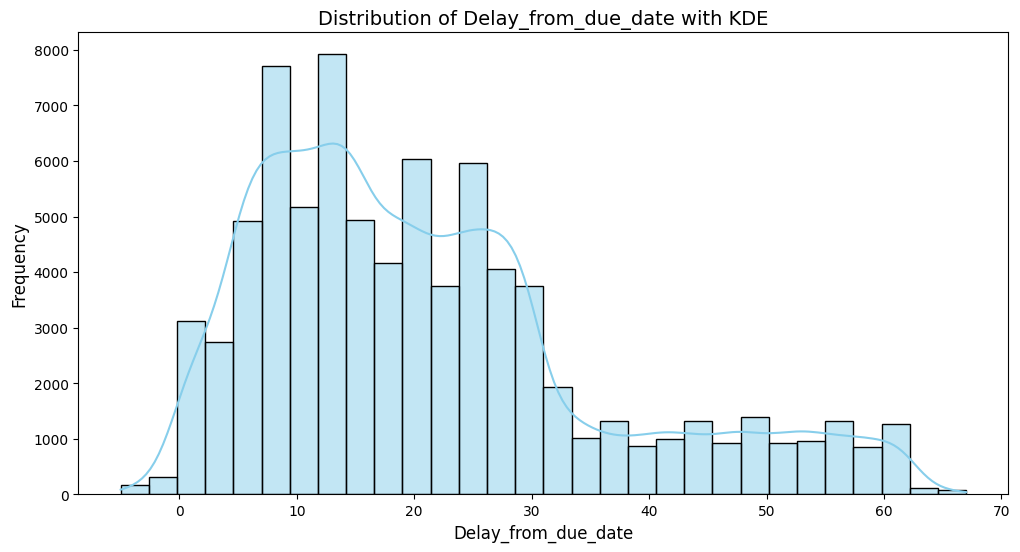

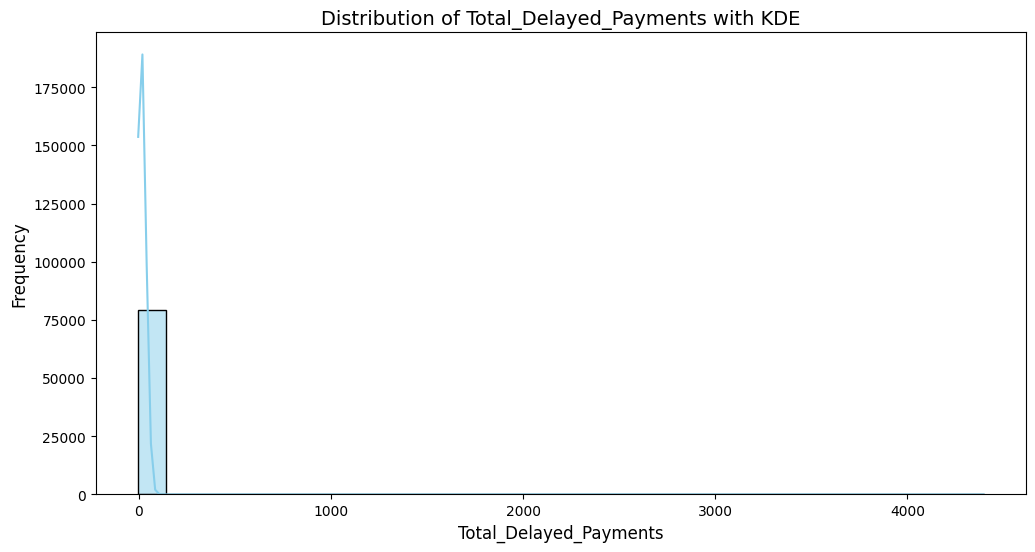

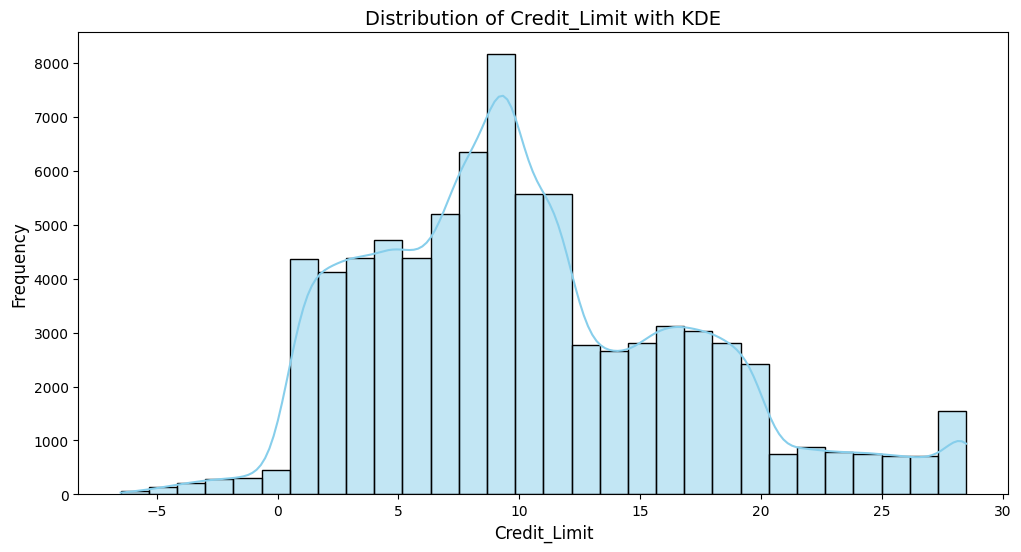

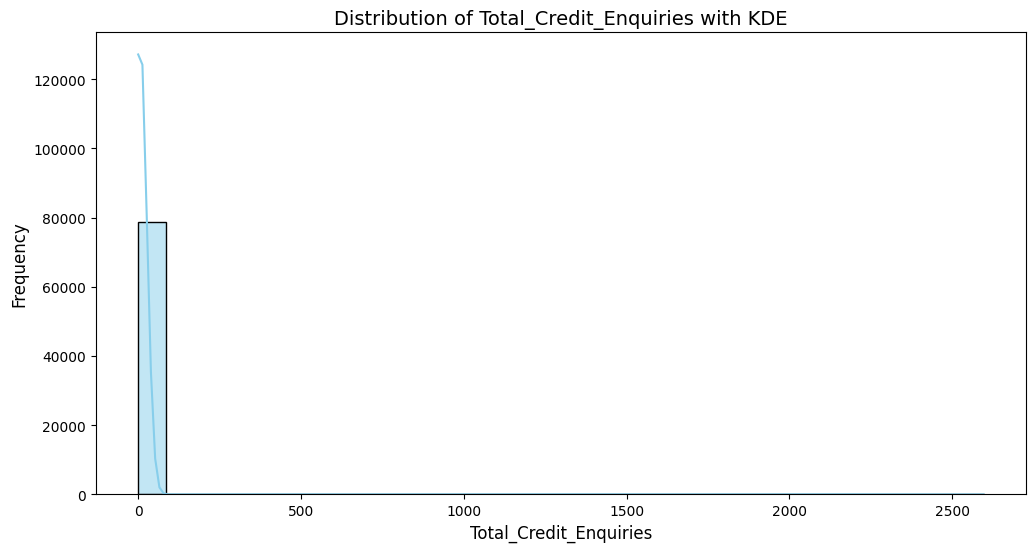

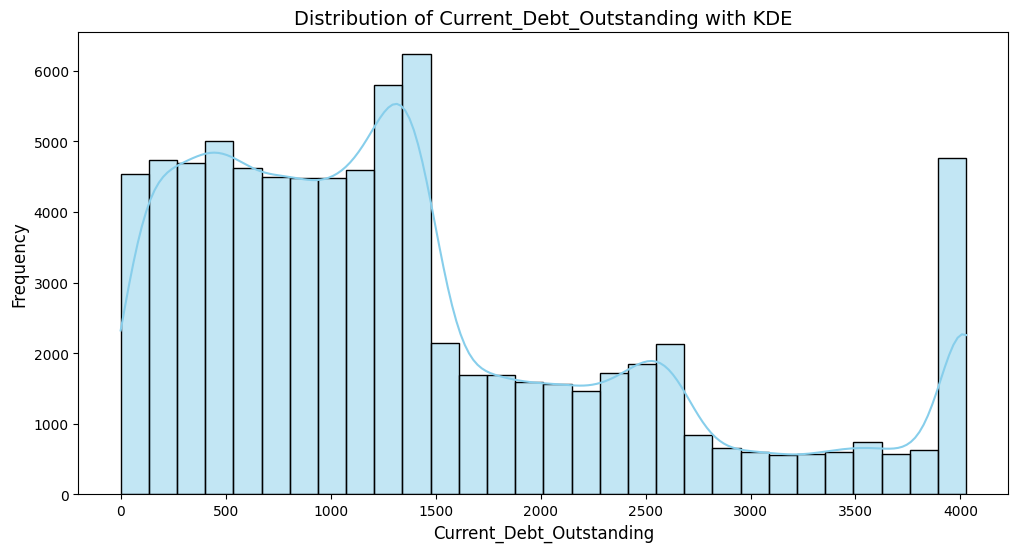

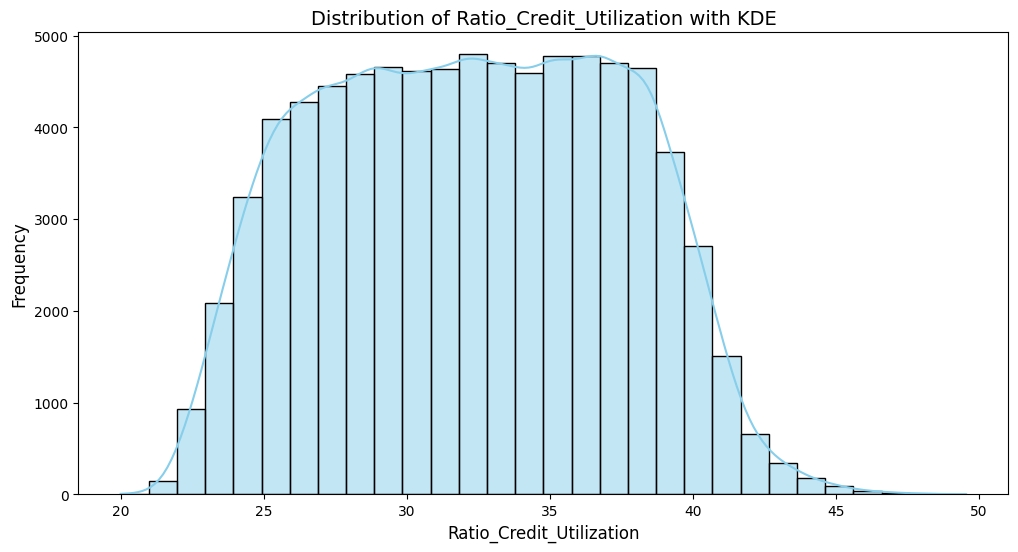

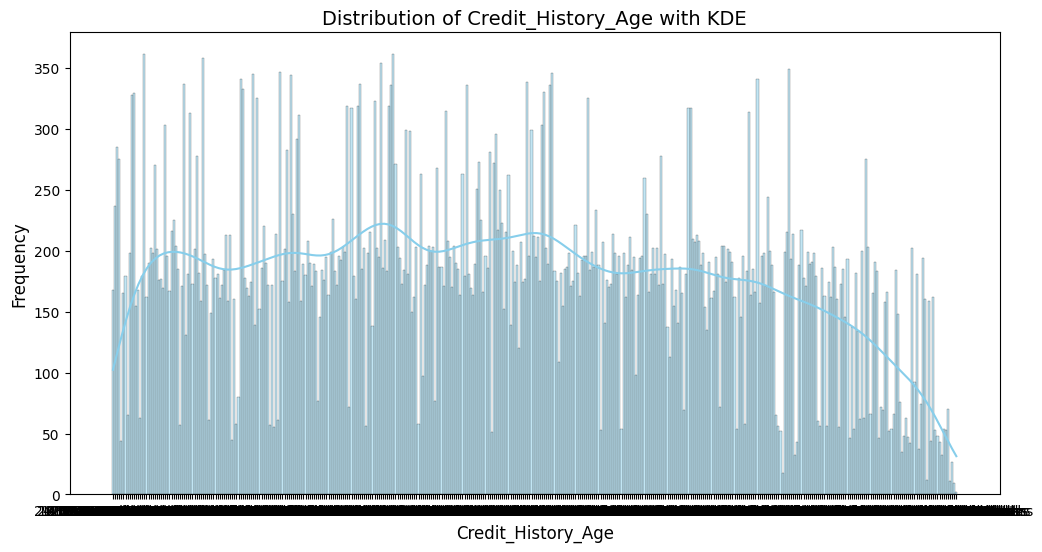

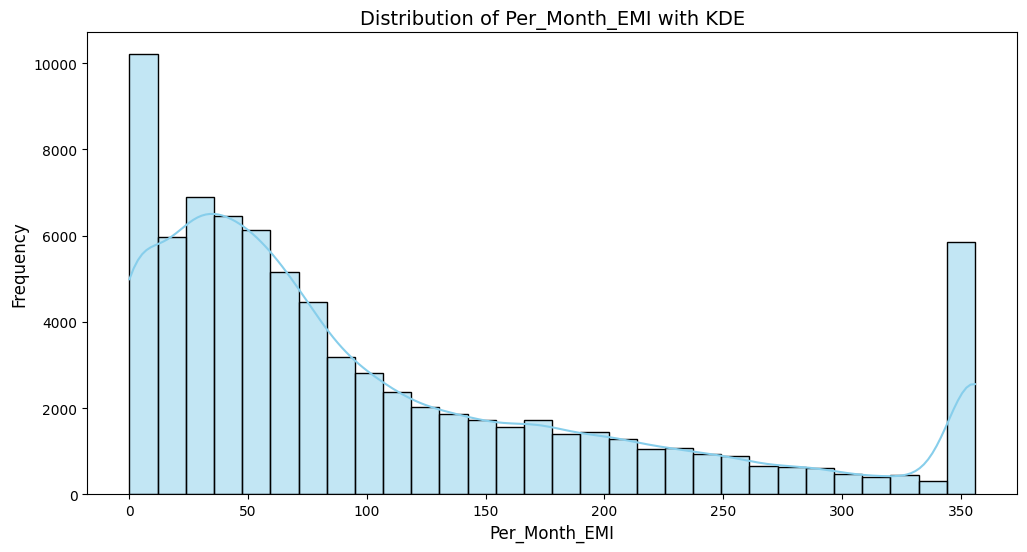

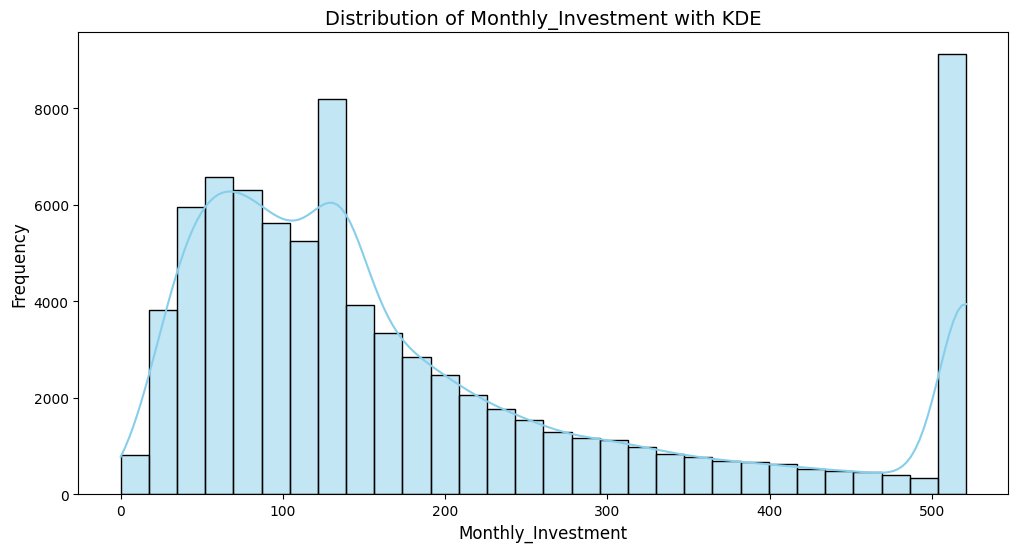

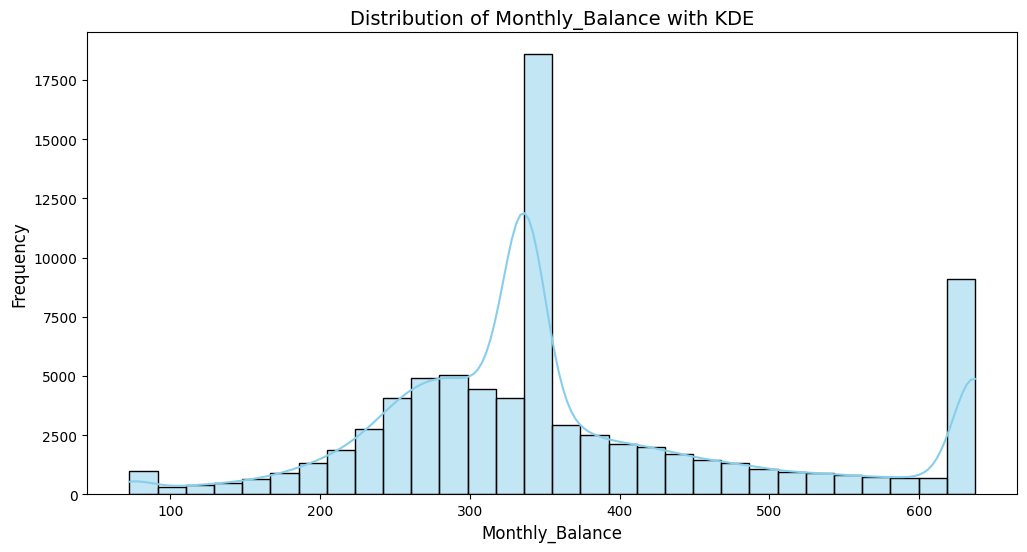

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataframe is called df

# List of numerical columns to plot
numerical_columns = [
    'Age', 'Income_Annual', 'Base_Salary_PerMonth', 'Total_Bank_Accounts',
    'Total_Credit_Cards', 'Rate_Of_Interest', 'Total_Current_Loans',
    'Delay_from_due_date', 'Total_Delayed_Payments', 'Credit_Limit',
    'Total_Credit_Enquiries', 'Current_Debt_Outstanding',
    'Ratio_Credit_Utilization', 'Credit_History_Age',
    'Per_Month_EMI', 'Monthly_Investment', 'Monthly_Balance'
]

# Plot histogram and KDE for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(train_data[col], kde=True, bins=30, color='skyblue')

    # Set titles and labels
    plt.title(f'Distribution of {col} with KDE', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.show()


In [238]:
train_data.head()

ID Customer_ID     Month               Name   Age       Number  \
0   0x522a  CUS_0x2dbf       May  Abhishek Vishnoiw  51.0  370-51-2390   
1   0x6091  CUS_0x8167    August          Freifeldu  23.0  721-85-0529   
2   0xcb5f  CUS_0x3a0b  February                NaN  49.0  618-96-2558   
3  0x17dbc  CUS_0x9a4b     March  Alex Dobuzinskiso  40.0  817-31-4270   
4  0x225b3  CUS_0x253a      June                NaN  17.0  580-53-4920   

   Profession  Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  ...  \
0    Musician    101583.4800           3086.683333                  5.0  ...   
1      Writer    101926.9500           8635.912500                  4.0  ...   
2      Writer    152567.0375           3086.683333                  0.0  ...   
3      Doctor     60379.2800           3086.683333                  5.0  ...   
4  Accountant     50050.8300           4085.902500                  9.0  ...   

    Credit_Mix  Current_Debt_Outstanding  Ratio_Credit_Utilization  \
0     Standard                     50.93                 34.462154   
1  unspecified                   1058.00                 39.693812   
2         Good                    576.48                 39.367225   
3     Standard                    725.39                 29.061701   
4          Bad                   3419.10                 30.386321   

      Credit_History_Age  Payment_of_Min_Amount  Per_Month_EMI  \
0  24 Years and 1 Months                     No     190.811017   
1  20 Years and 5 Months                     No      70.587681   
2  19 Years and 0 Months                     No      86.905860   
3  17 Years and 1 Months                     NM      90.906385   
4   4 Years and 6 Months                    Yes     190.445060   

   Monthly_Investment                 Payment_Behaviour Monthly_Balance  \
0          521.203251    Low_spent_Large_value_payments      314.002193   
1          521.203251   Low_spent_Medium_value_payments      410.199642   
2          521.203251   Low_spent_Medium_value_payments      637.196538   
3          166.418658  High_spent_Medium_value_payments      473.135623   
4           56.789441   High_spent_Large_value_payments      401.355749   

   Credit_Score  
0      Standard  
1      Standard  
2      Standard  
3      Standard  
4          Poor  

[5 rows x 28 columns]

# Correlation Matrix
### Heatmap:
A heatmap of the correlation matrix for numerical variables can show relationships between features like **Income_Annual**, **Total_Current_Loans**, **Current_Debt_Outstanding**, and **Ratio_Credit_Utilization**. This may highlight factors that correlate with higher or lower credit scores.

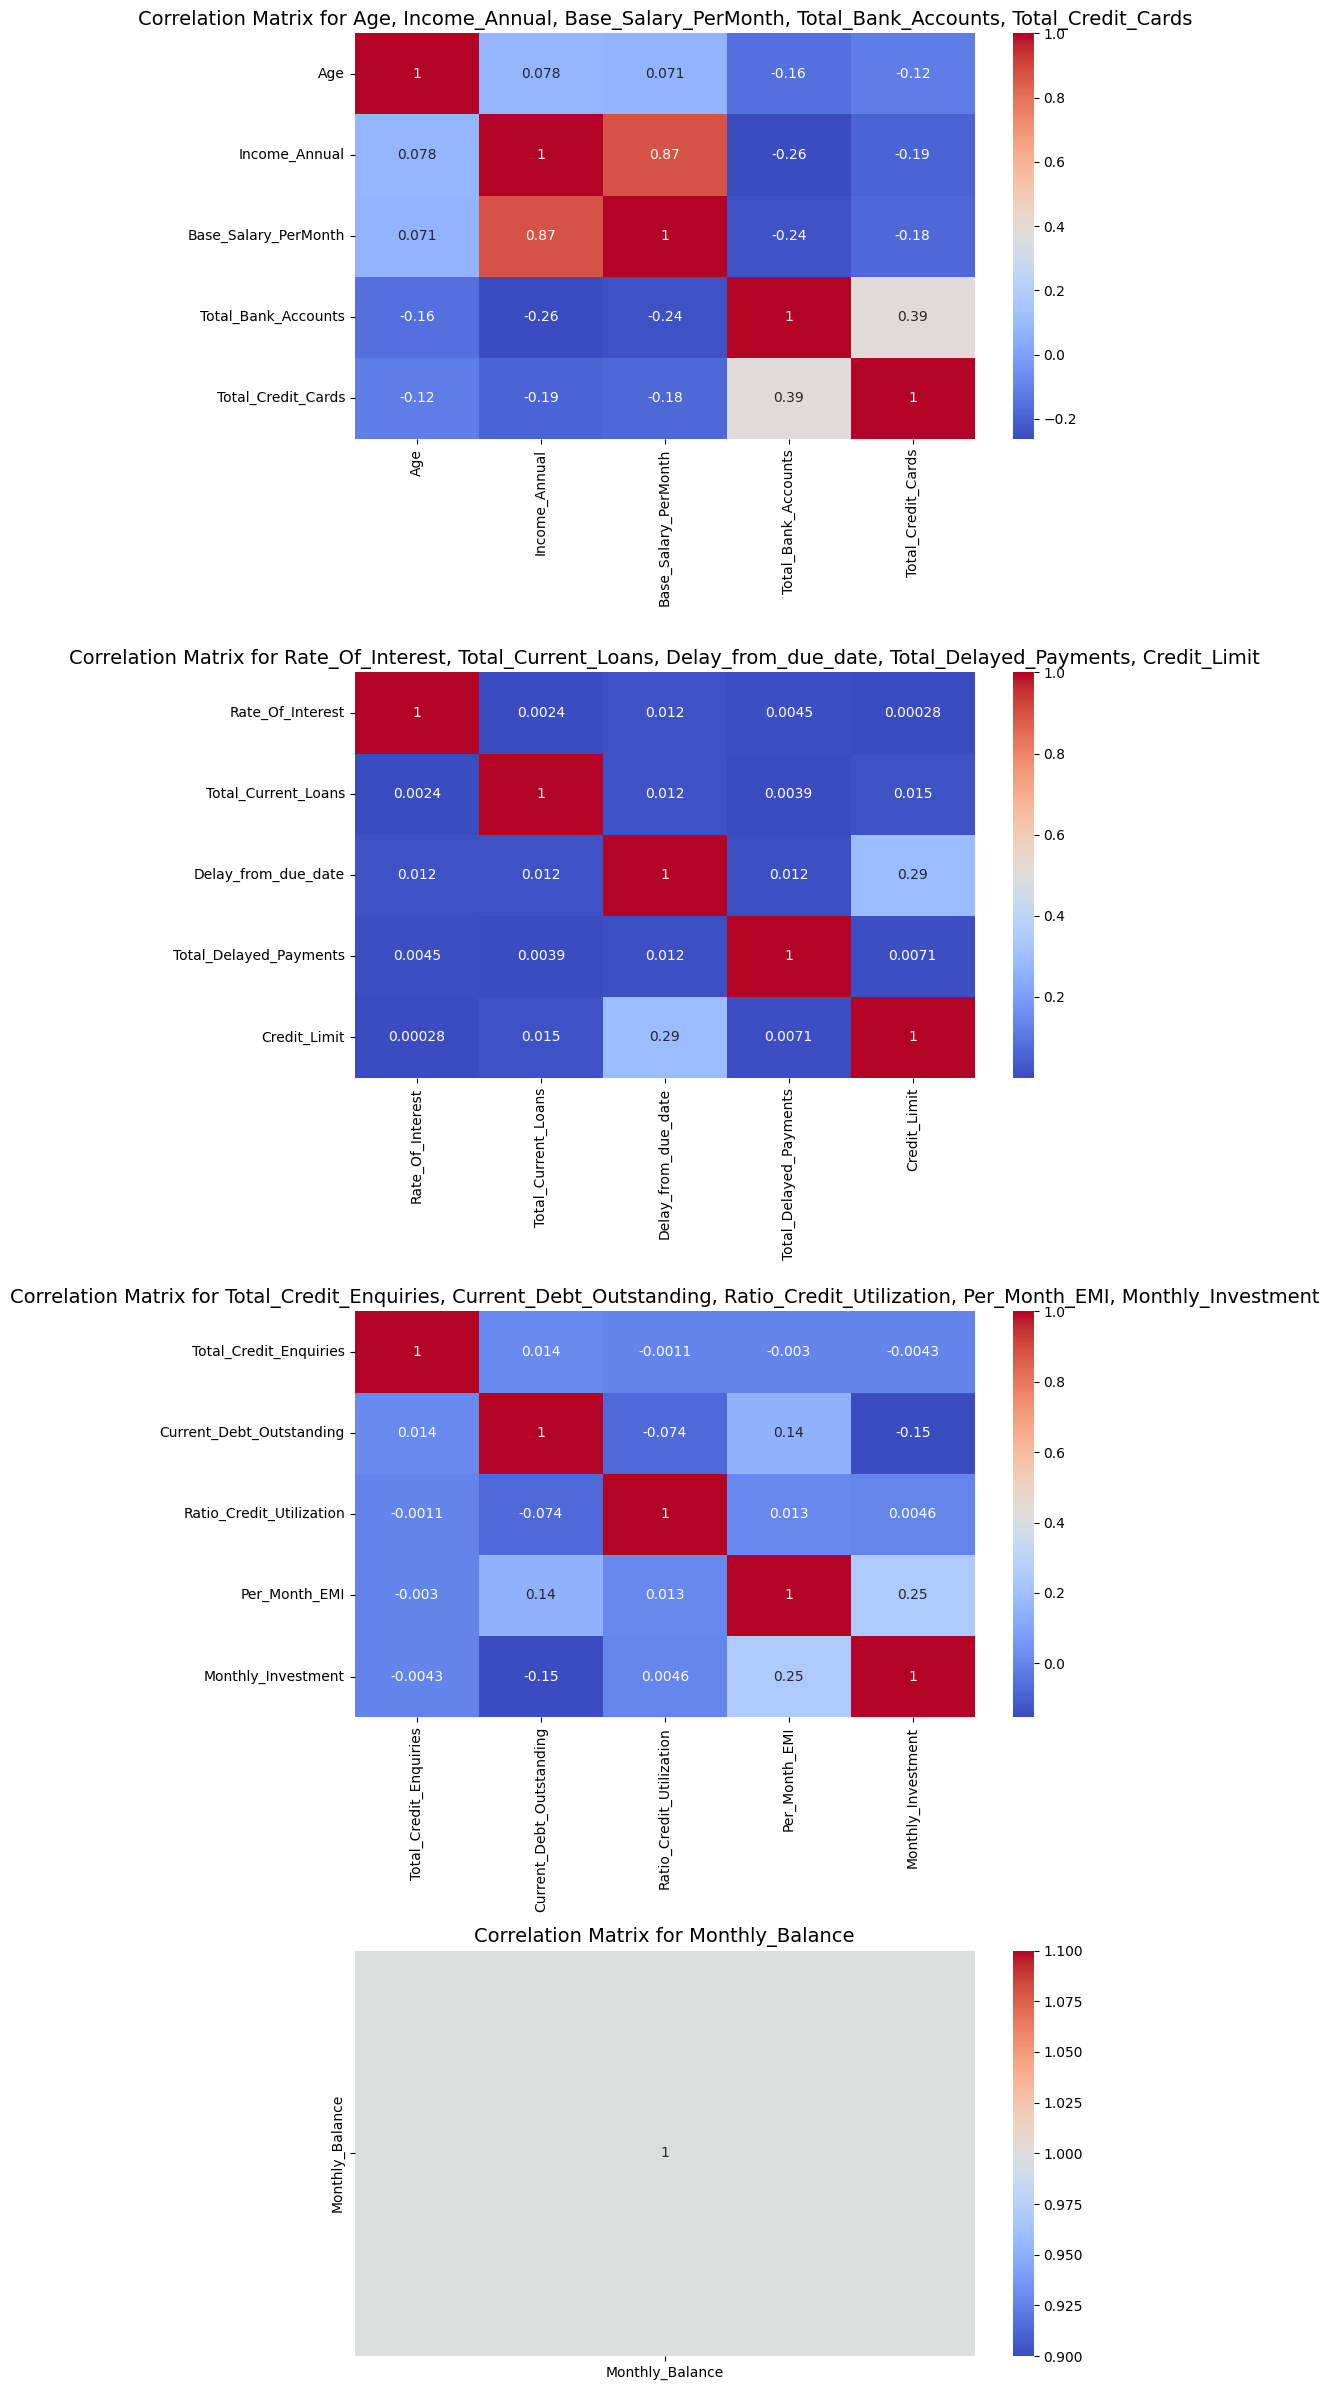

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns, like 'ID', before calculating the correlation matrix
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])  # Keeps only numeric columns

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set up the matplotlib figure with subplots in a single column
chunk_size = 5  # Define the chunk size (number of features per subplot)
num_plots = (len(corr_matrix.columns) + chunk_size - 1) // chunk_size  # Calculate number of plots

fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 6))  # Adjust height based on the number of plots
axes = axes.flatten()  # Flatten the array of axes for easy iteration

columns = corr_matrix.columns

# Loop through each set of features and plot the correlation heatmap
for i in range(0, len(columns), chunk_size):
    subset_columns = columns[i:i + chunk_size]  # Select a subset of features
    subset_corr = corr_matrix.loc[subset_columns, subset_columns]  # Get correlation matrix for the subset

    sns.heatmap(subset_corr, annot=True, cmap='coolwarm', ax=axes[i // chunk_size], cbar=True)
    axes[i // chunk_size].set_title(f"Correlation Matrix for {', '.join(subset_columns)}", fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Handling Garbage Columns

In [240]:
print("No of columns before drop: ",train_data.columns.size)
print("No of columns before drop: ",test_data.columns.size)
train_data = train_data.drop(columns=['Name', 'Customer_ID', 'Number'])
test_data = test_data.drop(columns=['Name', 'Customer_ID', 'Number'])
print("No of columns after drop: ",train_data.columns.size)
print("No of columns after drop: ",test_data.columns.size)

No of columns before drop:  28
No of columns before drop:  27
No of columns after drop:  25
No of columns after drop:  24


Updating **Credit_History_Age** with value in **Months**

In [241]:
import numpy as np

def calculate_total_months(history):
    if pd.isna(history):  # Check for NaN values directly using pandas
        return np.nan
    histlist = history.split()  # Split by whitespace
    years = int(histlist[0]) if histlist[0].isdigit() else 0
    months = int(histlist[3]) if len(histlist) > 3 and histlist[3].isdigit() else 0
    return years * 12 + months

train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(calculate_total_months)
test_data['Credit_History_Age'] = test_data['Credit_History_Age'].apply(calculate_total_months)

Removing null values of **Credit_History_Age**

In [242]:
train_data["Credit_History_Age"].isnull().sum()
test_data["Credit_History_Age"].isnull().sum()

1790

In [243]:
train_data["Credit_History_Age"].fillna(train_data["Credit_History_Age"].median(),inplace = True)
test_data["Credit_History_Age"].fillna(test_data["Credit_History_Age"].median(),inplace = True)

C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\1563502350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Credit_History_Age"].fillna(train_data["Credit_History_Age"].median(),inplace = True)
C:\Users\Areen Vaghasiya\AppData\Local\Temp\ipykernel_2452\1563502350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

In [244]:
print(train_data.dtypes)

ID                           object
Month                        object
Age                         float64
Profession                   object
Income_Annual               float64
Base_Salary_PerMonth        float64
Total_Bank_Accounts         float64
Total_Credit_Cards          float64
Rate_Of_Interest              int64
Total_Current_Loans           int64
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments      float64
Credit_Limit                float64
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding    float64
Ratio_Credit_Utilization    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment          float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [245]:
print(test_data.dtypes)

ID                           object
Month                        object
Age                           int64
Profession                   object
Income_Annual               float64
Base_Salary_PerMonth        float64
Total_Bank_Accounts           int64
Total_Credit_Cards            int64
Rate_Of_Interest              int64
Total_Current_Loans           int64
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments      float64
Credit_Limit                float64
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding    float64
Ratio_Credit_Utilization    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment          float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object


In [246]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ID                             0
Month                          0
Age                            0
Profession                     0
Income_Annual                  0
Base_Salary_PerMonth           0
Total_Bank_Accounts            0
Total_Credit_Cards             0
Rate_Of_Interest               0
Total_Current_Loans            0
Loan_Type                   9157
Delay_from_due_date            0
Total_Delayed_Payments         0
Credit_Limit                   0
Total_Credit_Enquiries         0
Credit_Mix                     0
Current_Debt_Outstanding       0
Ratio_Credit_Utilization       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Per_Month_EMI                  0
Monthly_Investment             0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64
ID                             0
Month                          0
Age                            0
Profession                     0
Income_Annual                 

# Encoding for Loan_Types

This is necessary because 1 value has multiple loan types written a string. eg - "Payday Loan, Student Loan, Payday Loan, Mortgage Loan"

In [247]:
loan_types = set()
for loans in train_data['Loan_Type'].dropna():
    # Remove the word "and" and split by commas
    for loan in loans.replace("and", "").split(','):
        loan_types.add(loan.strip())

# Remove any surrounding whitespace in loan type names and convert to a list
loan_types = [loan for loan in loan_types if loan]  # Filter out any empty strings

# Create a new column for each loan type and initialize it to 0
for loan_type in loan_types:
    train_data[loan_type] = 0

# Add a column for 'Not Specified' if 'Loan_Type' has any missing values
if train_data['Loan_Type'].isna().sum() > 0:
    train_data['Not Specified'] = 0

# Iterate through each row to count the loans in Loan_Type
for idx, row in train_data.iterrows():
    if pd.isna(row['Loan_Type']):
        # Mark 'Not Specified' if no loan type is listed
        train_data.at[idx, 'Not Specified'] = 1
    else:
        # Remove "and" and split by commas to update counts for each type
        for loan in row['Loan_Type'].replace("and", "").split(','):
            loan = loan.strip()  # Remove any whitespace
            if loan in train_data.columns:
                train_data.at[idx, loan] += 1

# Display the first few rows to verify
train_data.head()


ID     Month   Age  Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x522a       May  51.0    Musician    101583.4800           3086.683333   
1   0x6091    August  23.0      Writer    101926.9500           8635.912500   
2   0xcb5f  February  49.0      Writer    152567.0375           3086.683333   
3  0x17dbc     March  40.0      Doctor     60379.2800           3086.683333   
4  0x225b3      June  17.0  Accountant     50050.8300           4085.902500   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                  5.0                 7.0                10   
1                  4.0                 4.0                 9   
2                  0.0                 4.0                 8   
3                  5.0                 6.0                18   
4                  9.0                10.0                20   

   Total_Current_Loans  ... Credit_Score  Home Equity Loan  \
0                    4  ...     Standard                 0   
1                    1  ...     Standard                 0   
2                    1  ...     Standard                 1   
3                    3  ...     Standard                 0   
4                    5  ...         Poor                 0   

   Debt Consolidation Loan  Payday Loan  Personal Loan Student Loan  \
0                        1            2              0            1   
1                        0            0              0            0   
2                        0            0              0            0   
3                        0            0              1            0   
4                        2            0              1            1   

   Auto Loan  Not Specified  Credit-Builder Loan Mortgage Loan  
0          0              0                    0             0  
1          0              0                    0             1  
2          0              0                    0             0  
3          0              0                    1             1  
4          0              0                    1             0  

[5 rows x 34 columns]

Similarly, correcting for test_data:

In [248]:
loan_types2 = set()
for loans in test_data['Loan_Type'].dropna():
    # Remove the word "and" and split by commas
    for loan in loans.replace("and", "").split(','):
        loan_types2.add(loan.strip())

# Remove any surrounding whitespace in loan type names and convert to a list
loan_types2 = [loan for loan in loan_types2 if loan]  # Filter out any empty strings

# Create a new column for each loan type and initialize it to 0
for loan_type in loan_types2:
    test_data[loan_type] = 0

# Add a column for 'Not Specified' if 'Loan_Type' has any missing values
if test_data['Loan_Type'].isna().sum() > 0:
    test_data['Not Specified'] = 0

# Iterate through each row to count the loans in Loan_Type
for idx, row in test_data.iterrows():
    if pd.isna(row['Loan_Type']):
        # Mark 'Not Specified' if no loan type is listed
        test_data.at[idx, 'Not Specified'] = 1
    else:
        # Remove "and" and split by commas to update counts for each type
        for loan in row['Loan_Type'].replace("and", "").split(','):
            loan = loan.strip()  # Remove any whitespace
            if loan in test_data.columns:
                test_data.at[idx, loan] += 1

# Display the first few rows to verify
test_data.head()


ID     Month  Age    Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x2145     April   40      Mechanic      44386.470           3124.620833   
1   0x7d59    August   34     Developer      19506.730           1491.560833   
2   0xe753      June   39  Entrepreneur      39962.380           3151.198333   
3  0x19813  February   28      Mechanic       7477.175            713.097917   
4  0x1dc5e   January   44     Architect      41771.020           3293.918333   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                   10                   6                26   
1                    9                   7                22   
2                    6                   7                22   
3                    9                   5                15   
4                    6                  10                17   

   Total_Current_Loans  ... Monthly_Balance  Mortgage Loan  Home Equity Loan  \
0                    9  ...      270.918433              0                 0   
1                    6  ...      230.334277              1                 0   
2                    5  ...      357.954330              2                 0   
3                    8  ...      288.762718              0                 2   
4                    7  ...      342.331760              1                 1   

   Debt Consolidation Loan  Payday Loan Personal Loan  Student Loan  \
0                        2            3             0             0   
1                        1            0             1             2   
2                        0            1             0             0   
3                        0            1             0             2   
4                        1            0             0             0   

   Auto Loan  Credit-Builder Loan Not Specified  
0          1                    1             2  
1          1                    0             0  
2          2                    0             0  
3          2                    0             1  
4          1                    2             1  

[5 rows x 33 columns]

In [249]:
train_data.head()

ID     Month   Age  Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x522a       May  51.0    Musician    101583.4800           3086.683333   
1   0x6091    August  23.0      Writer    101926.9500           8635.912500   
2   0xcb5f  February  49.0      Writer    152567.0375           3086.683333   
3  0x17dbc     March  40.0      Doctor     60379.2800           3086.683333   
4  0x225b3      June  17.0  Accountant     50050.8300           4085.902500   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                  5.0                 7.0                10   
1                  4.0                 4.0                 9   
2                  0.0                 4.0                 8   
3                  5.0                 6.0                18   
4                  9.0                10.0                20   

   Total_Current_Loans  ... Credit_Score  Home Equity Loan  \
0                    4  ...     Standard                 0   
1                    1  ...     Standard                 0   
2                    1  ...     Standard                 1   
3                    3  ...     Standard                 0   
4                    5  ...         Poor                 0   

   Debt Consolidation Loan  Payday Loan  Personal Loan Student Loan  \
0                        1            2              0            1   
1                        0            0              0            0   
2                        0            0              0            0   
3                        0            0              1            0   
4                        2            0              1            1   

   Auto Loan  Not Specified  Credit-Builder Loan Mortgage Loan  
0          0              0                    0             0  
1          0              0                    0             1  
2          0              0                    0             0  
3          0              0                    1             1  
4          0              0                    1             0  

[5 rows x 34 columns]

In [250]:
test_data.head()

ID     Month  Age    Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x2145     April   40      Mechanic      44386.470           3124.620833   
1   0x7d59    August   34     Developer      19506.730           1491.560833   
2   0xe753      June   39  Entrepreneur      39962.380           3151.198333   
3  0x19813  February   28      Mechanic       7477.175            713.097917   
4  0x1dc5e   January   44     Architect      41771.020           3293.918333   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                   10                   6                26   
1                    9                   7                22   
2                    6                   7                22   
3                    9                   5                15   
4                    6                  10                17   

   Total_Current_Loans  ... Monthly_Balance  Mortgage Loan  Home Equity Loan  \
0                    9  ...      270.918433              0                 0   
1                    6  ...      230.334277              1                 0   
2                    5  ...      357.954330              2                 0   
3                    8  ...      288.762718              0                 2   
4                    7  ...      342.331760              1                 1   

   Debt Consolidation Loan  Payday Loan Personal Loan  Student Loan  \
0                        2            3             0             0   
1                        1            0             1             2   
2                        0            1             0             0   
3                        0            1             0             2   
4                        1            0             0             0   

   Auto Loan  Credit-Builder Loan Not Specified  
0          1                    1             2  
1          1                    0             0  
2          2                    0             0  
3          2                    0             1  
4          1                    2             1  

[5 rows x 33 columns]

Reformatting the column names

In [251]:
train_data = train_data.drop(columns=['Loan_Type'])
for loan_type in loan_types:
    if loan_type in train_data.columns:
        train_data.rename(columns={loan_type: f"Loan_Type_{loan_type}"}, inplace=True)

test_data = test_data.drop(columns=['Loan_Type'])
for loan_type in loan_types2:
    if loan_type in test_data.columns:
        test_data.rename(columns={loan_type: f"Loan_Type_{loan_type}"}, inplace=True)


In [252]:
print(train_data.isnull().sum())

ID                                   0
Month                                0
Age                                  0
Profession                           0
Income_Annual                        0
Base_Salary_PerMonth                 0
Total_Bank_Accounts                  0
Total_Credit_Cards                   0
Rate_Of_Interest                     0
Total_Current_Loans                  0
Delay_from_due_date                  0
Total_Delayed_Payments               0
Credit_Limit                         0
Total_Credit_Enquiries               0
Credit_Mix                           0
Current_Debt_Outstanding             0
Ratio_Credit_Utilization             0
Credit_History_Age                   0
Payment_of_Min_Amount                0
Per_Month_EMI                        0
Monthly_Investment                   0
Payment_Behaviour                    0
Monthly_Balance                      0
Credit_Score                         0
Loan_Type_Home Equity Loan           0
Loan_Type_Debt Consolidat

In [253]:
print(test_data.isnull().sum())

ID                                   0
Month                                0
Age                                  0
Profession                           0
Income_Annual                        0
Base_Salary_PerMonth                 0
Total_Bank_Accounts                  0
Total_Credit_Cards                   0
Rate_Of_Interest                     0
Total_Current_Loans                  0
Delay_from_due_date                  0
Total_Delayed_Payments               0
Credit_Limit                         0
Total_Credit_Enquiries               0
Credit_Mix                           0
Current_Debt_Outstanding             0
Ratio_Credit_Utilization             0
Credit_History_Age                   0
Payment_of_Min_Amount                0
Per_Month_EMI                        0
Monthly_Investment                   0
Payment_Behaviour                    0
Monthly_Balance                      0
Loan_Type_Mortgage Loan              0
Loan_Type_Home Equity Loan           0
Loan_Type_Debt Consolidat

# Replacing garbage values of Payment Behaviour

!@9#%8 with "Not Specified"

In [254]:
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].replace('!@9#%8','Not Specified')
test_data['Payment_Behaviour'] = test_data['Payment_Behaviour'].replace('!@9#%8','Not Specified')

In [255]:
train_data['Payment_Behaviour'][60:80]

60      Low_spent_Small_value_payments
61     High_spent_Large_value_payments
62    High_spent_Medium_value_payments
63      Low_spent_Large_value_payments
64      Low_spent_Large_value_payments
65     High_spent_Large_value_payments
66     High_spent_Small_value_payments
67      Low_spent_Small_value_payments
68    High_spent_Medium_value_payments
69    High_spent_Medium_value_payments
70      Low_spent_Small_value_payments
71                       Not Specified
72    High_spent_Medium_value_payments
73    High_spent_Medium_value_payments
74     High_spent_Large_value_payments
75     High_spent_Large_value_payments
76      Low_spent_Small_value_payments
77     High_spent_Large_value_payments
78      Low_spent_Large_value_payments
79     Low_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

# Encoding the remaining columns

In [256]:
# print(test_data.columns)
print(train_data['Profession'].unique())
print(test_data['Profession'].unique())

['Musician' 'Writer' 'Doctor' 'Accountant' 'unspecified' 'Engineer'
 'Manager' 'Media_Manager' 'Teacher' 'Developer' 'Architect' 'Mechanic'
 'Lawyer' 'Entrepreneur' 'Scientist' 'Journalist']
['Mechanic' 'Developer' 'Entrepreneur' 'Architect' 'Teacher' 'Writer'
 'unspecified' 'Journalist' 'Scientist' 'Doctor' 'Musician' 'Lawyer'
 'Engineer' 'Accountant' 'Media_Manager' 'Manager']


In [257]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for each column
month_le = LabelEncoder()
profession_le = LabelEncoder()
credit_mix_le = LabelEncoder()
payment_min_amt_le = LabelEncoder()
payment_behaviour_le = LabelEncoder()

# Fit and transform each column in train_data
train_data['Month'] = month_le.fit_transform(train_data['Month'])
train_data['Profession'] = profession_le.fit_transform(train_data['Profession'])
train_data['Credit_Mix'] = credit_mix_le.fit_transform(train_data['Credit_Mix'])
train_data['Payment_of_Min_Amount'] = payment_min_amt_le.fit_transform(train_data['Payment_of_Min_Amount'])
train_data['Payment_Behaviour'] = payment_behaviour_le.fit_transform(train_data['Payment_Behaviour'])

# Transform each column in test_data using the fitted LabelEncoders from train_data
test_data['Month'] = month_le.transform(test_data['Month'])
test_data['Profession'] = profession_le.transform(test_data['Profession'])
test_data['Credit_Mix'] = credit_mix_le.transform(test_data['Credit_Mix'])
test_data['Payment_of_Min_Amount'] = payment_min_amt_le.transform(test_data['Payment_of_Min_Amount'])
test_data['Payment_Behaviour'] = payment_behaviour_le.transform(test_data['Payment_Behaviour'])

# (Optional) Print classes for each encoder to verify
print("Month classes:", month_le.classes_)
print("Profession classes:", profession_le.classes_)
print("Credit Mix classes:", credit_mix_le.classes_)
print("Payment of Min Amount classes:", payment_min_amt_le.classes_)
print("Payment Behaviour classes:", payment_behaviour_le.classes_)



Month classes: ['April' 'August' 'February' 'January' 'July' 'June' 'March' 'May']
Profession classes: ['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Scientist' 'Teacher' 'Writer' 'unspecified']
Credit Mix classes: ['Bad' 'Good' 'Standard' 'unspecified']
Payment of Min Amount classes: ['NM' 'No' 'Yes']
Payment Behaviour classes: ['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'Not Specified']


In [258]:
train_data.head()


ID  Month   Age  Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x522a      7  51.0          11    101583.4800           3086.683333   
1   0x6091      1  23.0          14    101926.9500           8635.912500   
2   0xcb5f      2  49.0          14    152567.0375           3086.683333   
3  0x17dbc      6  40.0           3     60379.2800           3086.683333   
4  0x225b3      5  17.0           0     50050.8300           4085.902500   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                  5.0                 7.0                10   
1                  4.0                 4.0                 9   
2                  0.0                 4.0                 8   
3                  5.0                 6.0                18   
4                  9.0                10.0                20   

   Total_Current_Loans  ...  Credit_Score  Loan_Type_Home Equity Loan  \
0                    4  ...      Standard                           0   
1                    1  ...      Standard                           0   
2                    1  ...      Standard                           1   
3                    3  ...      Standard                           0   
4                    5  ...          Poor                           0   

   Loan_Type_Debt Consolidation Loan  Loan_Type_Payday Loan  \
0                                  1                      2   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  2                      0   

   Loan_Type_Personal Loan  Loan_Type_Student Loan  Loan_Type_Auto Loan  \
0                        0                       1                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        1                       0                    0   
4                        1                       1                    0   

   Loan_Type_Not Specified  Loan_Type_Credit-Builder Loan  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              1   
4                        0                              1   

   Loan_Type_Mortgage Loan  
0                        0  
1                        1  
2                        0  
3                        1  
4                        0  

[5 rows x 33 columns]

In [259]:
test_data.head()

ID  Month  Age  Profession  Income_Annual  Base_Salary_PerMonth  \
0   0x2145      0   40           9      44386.470           3124.620833   
1   0x7d59      1   34           2      19506.730           1491.560833   
2   0xe753      5   39           5      39962.380           3151.198333   
3  0x19813      2   28           9       7477.175            713.097917   
4  0x1dc5e      3   44           1      41771.020           3293.918333   

   Total_Bank_Accounts  Total_Credit_Cards  Rate_Of_Interest  \
0                   10                   6                26   
1                    9                   7                22   
2                    6                   7                22   
3                    9                   5                15   
4                    6                  10                17   

   Total_Current_Loans  ...  Monthly_Balance  Loan_Type_Mortgage Loan  \
0                    9  ...       270.918433                        0   
1                    6  ...       230.334277                        1   
2                    5  ...       357.954330                        2   
3                    8  ...       288.762718                        0   
4                    7  ...       342.331760                        1   

   Loan_Type_Home Equity Loan  Loan_Type_Debt Consolidation Loan  \
0                           0                                  2   
1                           0                                  1   
2                           0                                  0   
3                           2                                  0   
4                           1                                  1   

   Loan_Type_Payday Loan  Loan_Type_Personal Loan  Loan_Type_Student Loan  \
0                      3                        0                       0   
1                      0                        1                       2   
2                      1                        0                       0   
3                      1                        0                       2   
4                      0                        0                       0   

   Loan_Type_Auto Loan  Loan_Type_Credit-Builder Loan  Loan_Type_Not Specified  
0                    1                              1                        2  
1                    1                              0                        0  
2                    2                              0                        0  
3                    2                              0                        1  
4                    1                              2                        1  

[5 rows x 32 columns]

# Plotting graphs for KNN

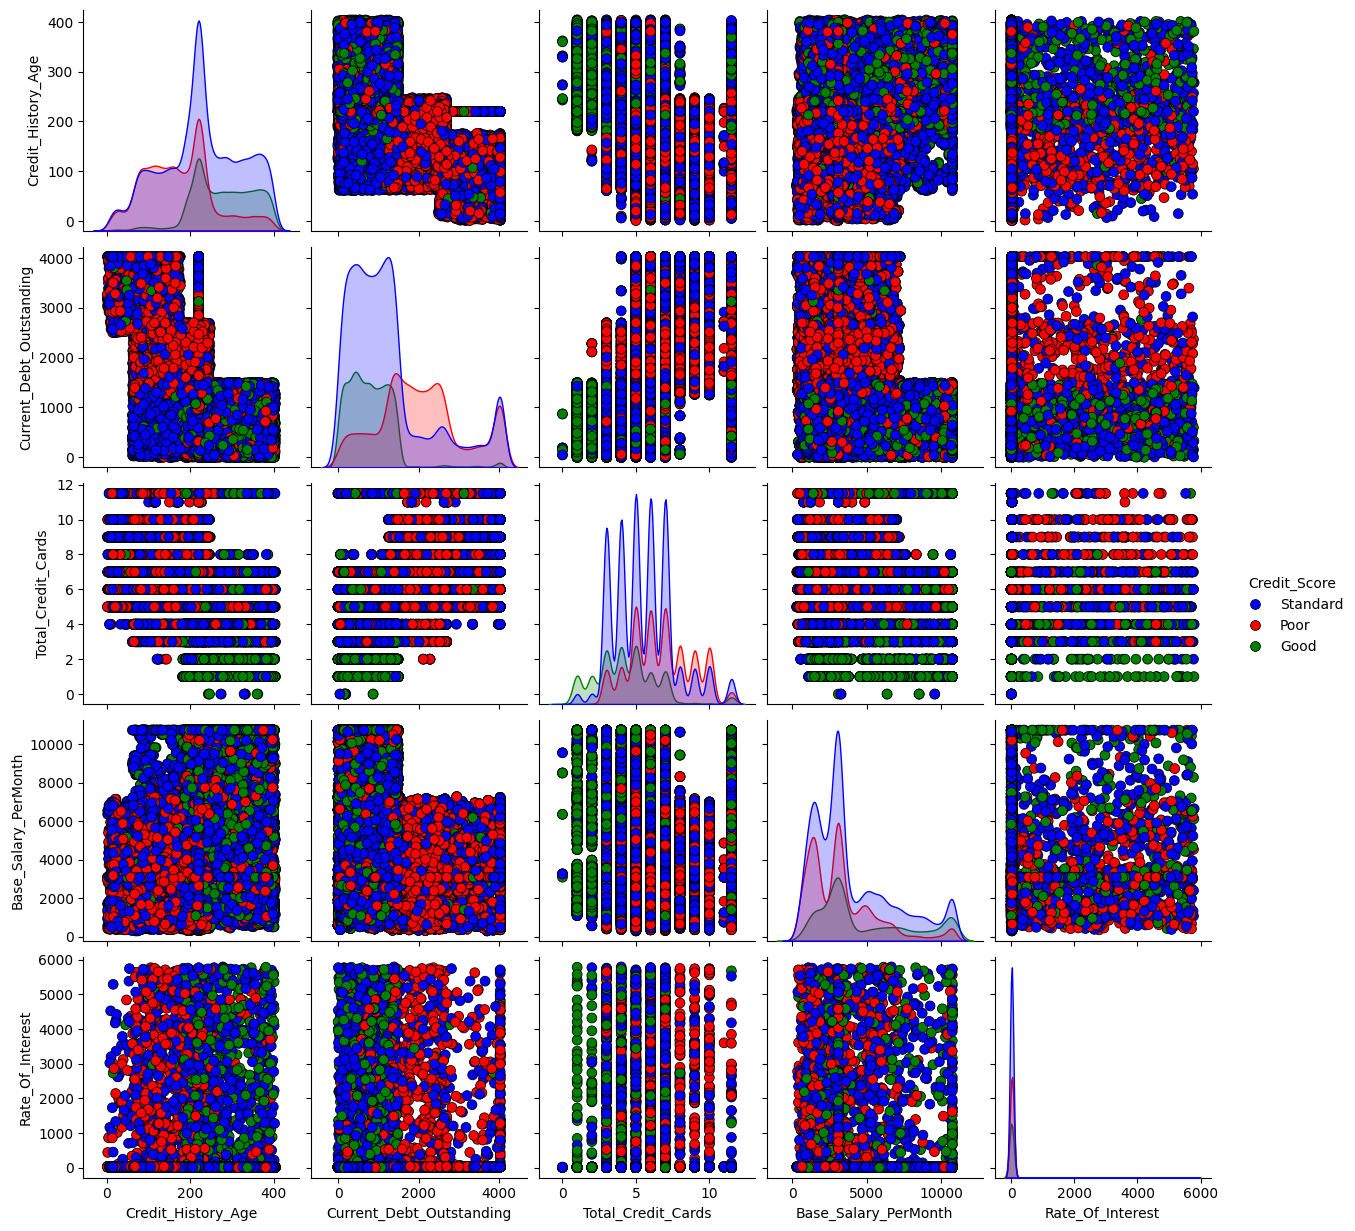

In [260]:
import seaborn as sns
color_map = {'Standard': 'blue', 'Poor': 'red', 'Good': 'green'}
# Select only a subset of columns, including 'Credit_Score'
selected_columns = ['Credit_History_Age', 'Current_Debt_Outstanding', 'Total_Credit_Cards', 'Base_Salary_PerMonth','Credit_Score','Rate_Of_Interest']

# Map the colors for the Credit_Score categories
train_data['Credit_Score_Color'] = train_data['Credit_Score'].map(color_map)

# Use Seaborn's pairplot
sns.pairplot(train_data[selected_columns], hue='Credit_Score', palette=color_map, plot_kws={'edgecolor': 'k', 's': 50})
plt.show()

In [261]:
train_data.drop(columns='Credit_Score_Color',inplace=True)

In [262]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data.loc[:, 'Credit_Score'])

# K nearest neighbour modelling

In [263]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target labels for training and testing

# Fit the model to the training data
# random_search_xgb.fit(X_train, y_train_encoded)

# Separate features and target variables for training and testing
X_train_knn = train.drop(columns=['ID','Credit_Score'])
y_train_knn = train['Credit_Score']
y_train_encoded_knn = label_encoder.fit_transform(y_train_knn)
X_test_knn = test.drop(columns=['ID','Credit_Score'])
y_test_knn = test['Credit_Score']
y_test_encoded_knn = label_encoder.transform(y_test_knn)



K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train_knn, y_train_knn)

    training_score = clf.score(X_train_knn, y_train_encoded_knn)
    test_score = clf.score(X_test_knn, y_test_encoded_knn)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
print(scores)

{2: [0.0, 0.0], 3: [0.0, 0.0], 4: [0.0, 0.0], 5: [0.0, 0.0], 6: [0.0, 0.0], 7: [0.0, 0.0], 8: [0.0, 0.0], 9: [0.0, 0.0], 10: [0.0, 0.0], 11: [0.0, 0.0], 12: [0.0, 0.0], 13: [0.0, 0.0], 14: [0.0, 0.0], 15: [0.0, 0.0], 16: [0.0, 0.0], 17: [0.0, 0.0], 18: [0.0, 0.0], 19: [0.0, 0.0], 20: [0.0, 0.0]}


In [264]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data.loc[:, 'Credit_Score'])

# XGBoost Classifier

In [265]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target labels for training and testing

# Fit the model to the training data
# random_search_xgb.fit(X_train, y_train_encoded)

# Separate features and target variables for training and testing
X_train = train.drop(columns=['ID','Credit_Score'])
y_train = train['Credit_Score']
y_train_encoded = label_encoder.fit_transform(y_train)
X_test = test.drop(columns=['ID','Credit_Score'])
y_test = test['Credit_Score']
y_test_encoded = label_encoder.transform(y_test)



param_distributions_xgb = {
    'n_estimators': [100,200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7, 10, 15],               # Maximum depth of a tree
    'min_child_weight': [1, 5, 10],            # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],              # Fraction of observations used to build each tree
    'colsample_bytree': [0.6, 0.8, 1.0],       # Fraction of features used for tree building
    'gamma': [0, 0.1, 0.3],                    # Minimum loss reduction required to make a split
    'reg_alpha': [0, 0.01, 0.1],               # L1 regularization term on weights (lasso regression)
    'reg_lambda': [1, 1.5, 2]                  # L2 regularization term on weights (ridge regression)
}


# Ensure that both train and test sets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now you can fit the model
# random_search_xgb.fit(X_train, y_train_encoded)

# Initialize the XGBoost classifier
xgboost_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgboost_clf, param_distributions=param_distributions_xgb,
                                       n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)




# Fit the model to the training data
random_search_xgb.fit(X_train, y_train_encoded)

# Get the best model from RandomizedSearchCV
best_xgb = random_search_xgb.best_estimator_

# Evaluate the model on both training and testing sets
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
# Specify 'weighted' for multiclass precision
test_precision = precision_score(y_test_encoded, y_pred_test, average='weighted') # Changed line
test_recall = recall_score(y_test_encoded, y_pred_test, average='weighted') # Changed line
test_f1 = f1_score(y_test_encoded, y_pred_test, average='weighted') # Changed line

# Print results
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("XGBoost Training Accuracy:", train_accuracy)
print("XGBoost Test Accuracy:", test_accuracy)
print("XGBoost Test Precision:", test_precision)
print("XGBoost Test Recall:", test_recall)
print("XGBoost Test F1 Score:", test_f1)

# Drop 'ID' column from test data
x_final_test = test_data.drop(columns=['ID']).reindex(columns=X_train.columns)

# Make predictions
y_pred_final_test_encoded = best_xgb.predict(x_final_test)

# Inverse transform the encoded predictions to original categorical values
y_pred_final_test = label_encoder.inverse_transform(y_pred_final_test_encoded)

# Create output dataframe with original 'Credit_Score' categories
output_xgb = pd.DataFrame({
    'ID': test_data['ID'],
    'Credit_Score': y_pred_final_test
})

# Save to CSV
output_xgb.to_csv('xgb_submission.csv', index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Areen Vaghasiya\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}
XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.7896875
XGBoost Test Precision: 0.7893084447529038
XGBoost Test Recall: 0.7896875
XGBoost Test F1 Score: 0.7894101446787625


# Naive Baysian Modelling


In [266]:
print(train_data.shape)

(80000, 33)


# One-Hot Encoding the Categorical Data



*   'Month'
*   'Profession'
*   'Loan_Type'
*   'Credit_Mix'
*   'Payment_of_Min_Amount'
*   'Payment_Behaviour'


In [267]:
import pandas as pd

# List of categorical columns to one-hot encode
categorical_columns = ['Month', 'Profession', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour']

# One-hot encode the categorical columns in both train and test dataframes
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# Align the test data to match train data columns (in case of any mismatches)
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)


In [268]:
from pickle import OBJ
# Get columns with object dtype
object_columns = train_data.select_dtypes(include='object').columns
object_columns2 = test_data.select_dtypes(include='object').columns
# Print the column names
print(object_columns)
print(object_columns2)
object_columns = train_data_encoded.select_dtypes(include='object').columns
object_columns2 = test_data_encoded.select_dtypes(include='object').columns
# Print the column names
print(object_columns)
print(object_columns2)

Index(['ID', 'Credit_Score'], dtype='object')
Index(['ID'], dtype='object')
Index(['ID', 'Credit_Score'], dtype='object')
Index(['ID'], dtype='object')


# Guassian Bayesian Classifier

In [269]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data_encoded, test_size=0.2, random_state=42, stratify=train_data_encoded.loc[:, 'Credit_Score'])

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target labels for training and testing

# Fit the model to the training data
# random_search_xgb.fit(X_train, y_train_encoded)

# Separate features and target variables for training and testing
X_train = train.drop(columns=['ID','Credit_Score'])
y_train = train['Credit_Score']
y_train_encoded = label_encoder.fit_transform(y_train)
X_test = test.drop(columns=['ID','Credit_Score'])
y_test = test['Credit_Score']
y_test_encoded = label_encoder.transform(y_test)

print(label_encoder.classes_)
print(label_encoder.inverse_transform([0, 1, 2]))

['Good' 'Poor' 'Standard']
['Good' 'Poor' 'Standard']


In [271]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naive Bayes classifier
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred_train = naive_bayes_clf.predict(X_train)
y_pred_test = naive_bayes_clf.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)

# Specify 'weighted' for multiclass precision
test_precision = precision_score(y_test_encoded, y_pred_test, average='weighted')
test_recall = recall_score(y_test_encoded, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_encoded, y_pred_test, average='weighted')

# Print results
print("Naive Bayes Training Accuracy:", train_accuracy)
print("Naive Bayes Test Accuracy:", test_accuracy)
print("Naive Bayes Test Precision:", test_precision)
print("Naive Bayes Test Recall:", test_recall)
print("Naive Bayes Test F1 Score:", test_f1)

# Drop 'ID' column from test data
x_final_test = test_data_encoded.drop(columns=['ID','Credit_Score'])

# Make predictions
y_pred_final_test_encoded = naive_bayes_clf.predict(x_final_test)

# Inverse transform the encoded predictions to original categorical values
y_pred_final_test = label_encoder.inverse_transform(y_pred_final_test_encoded)

# Create output dataframe with original 'Credit_Score' categories
output_naive_bayes = pd.DataFrame({
    'ID': test_data['ID'],
    'Credit_Score': y_pred_final_test
})

# Save to CSV
output_naive_bayes.to_csv('naive_bayes_submission.csv', index=False)


Naive Bayes Training Accuracy: 0.57453125
Naive Bayes Test Accuracy: 0.579625
Naive Bayes Test Precision: 0.6430200175586321
Naive Bayes Test Recall: 0.579625
Naive Bayes Test F1 Score: 0.5828130868127549


# Creating the models inputs

In [272]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target labels for training and testing

# Fit the model to the training data
# random_search_xgb.fit(X_train, y_train_encoded)

# Separate features and target variables for training and testing
X_train = train.drop(columns=['ID','Credit_Score'])
y_train = train['Credit_Score']
y_train_encoded = label_encoder.fit_transform(y_train)
X_test = test.drop(columns=['ID','Credit_Score'])
y_test = test['Credit_Score']
y_test_encoded = label_encoder.transform(y_test)


# Decision Trees

In [273]:

# Define hyperparameter distributions for AdaBoost, Random Forest, and Decision Tree
param_distributions_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the models
decisiontree_clf = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=decisiontree_clf, param_distributions=param_distributions_dt,
                                      n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model
random_search_dt.fit(X_train, y_train_encoded)

# Get the best model
best_dt = random_search_dt.best_estimator_

# Predictions for the best model
y_pred_dt_test = best_dt.predict(X_test)

# Evaluation metrics function
def print_metrics(model_name, y_test_encoded, y_pred):
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    print(f"{model_name} Test Accuracy: {accuracy}")
    print(f"{model_name} Test Precision: {precision}")
    print(f"{model_name} Test Recall: {recall}")
    print(f"{model_name} Test F1 Score: {f1}\n")

# Print metrics for the Decision Tree model
print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print_metrics("Decision Tree", y_test_encoded, y_pred_dt_test)

# Ensure x_final_test has the same columns as X_train
x_final_test = test_data.drop(columns=['ID']).reindex(columns=X_train.columns)

# Make predictions on the final test set
y_pred_final_test_encoded_dt = best_dt.predict(x_final_test)

# Inverse transform the encoded predictions to original categorical values
y_pred_final_test_dt = label_encoder.inverse_transform(y_pred_final_test_encoded_dt)

# Create output DataFrame for Decision Tree predictions
output_dt = pd.DataFrame({'ID': test_data['ID'], 'Credit_Score': y_pred_final_test_dt})

# Save to CSV
output_dt.to_csv('decisiontree_submission.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree Test Accuracy: 0.6985
Decision Tree Test Precision: 0.7041148325255205
Decision Tree Test Recall: 0.6985
Decision Tree Test F1 Score: 0.6993782855990274



# Random Forest

In [274]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

param_distributions_rf = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

randomforest_clf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(estimator=randomforest_clf, param_distributions=param_distributions_rf,
                                      n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search_rf.fit(X_train, y_train_encoded)

# Get the best model
best_rf = random_search_rf.best_estimator_

# Predict for model
y_pred_rf_test = best_rf.predict(X_test)

# Evaluation metrics for each model
#print metric for model
# Evaluation metrics for each model
def print_metrics(model_name, y_test_encoded, y_pred):
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    print(f"{model_name} Test Accuracy: {accuracy}")
    print(f"{model_name} Test Precision: {precision}")
    print(f"{model_name} Test Recall: {recall}")
    print(f"{model_name} Test F1 Score: {f1}\n")


print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print_metrics("Random Forest", y_test_encoded, y_pred_rf_test)


# Drop 'ID' column from test data
x_final_test = test_data.drop(columns=['ID']).reindex(columns=X_train.columns)

# Predictions for test_data for each model
y_pred_final_test_encoded_rf = best_rf.predict(x_final_test)

# Inverse transform the encoded predictions to original categorical values
y_pred_final_test_rf = label_encoder.inverse_transform(y_pred_final_test_encoded_rf)

# Create output dataframes for each model with original 'Credit_Score' categories
output_rf = pd.DataFrame({'ID': test_data['ID'], 'Credit_Score': y_pred_final_test_rf})
output_rf.to_csv('randomforest_submission.csv', index=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Random Forest Test Accuracy: 0.791625
Random Forest Test Precision: 0.7915230894386591
Random Forest Test Recall: 0.791625
Random Forest Test F1 Score: 0.7915713791278725



# ADA Boosting

In [275]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define hyperparameter distributions for AdaBoost, Random Forest, and Decision Tree
param_distributions_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}


# Initialize the models
adaboost_clf = AdaBoostClassifier(random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
random_search_ada = RandomizedSearchCV(estimator=adaboost_clf, param_distributions=param_distributions_ada,
                                       n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the models
random_search_ada.fit(X_train, y_train_encoded)

# Get the best models
best_ada = random_search_ada.best_estimator_

# Predictions for each model
y_pred_ada_test = best_ada.predict(X_test)


# Evaluation metrics for each model
def print_metrics(model_name, y_test_encoded, y_pred):
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    print(f"{model_name} Test Accuracy: {accuracy}")
    print(f"{model_name} Test Precision: {precision}")
    print(f"{model_name} Test Recall: {recall}")
    print(f"{model_name} Test F1 Score: {f1}\n")

# Print metrics for each model
print("Best Parameters for AdaBoost:", random_search_ada.best_params_)
print_metrics("AdaBoost", y_test_encoded, y_pred_ada_test)

x_final_test = test_data.drop(columns=['ID']).reindex(columns=X_train.columns)
# Predictions for test_data for each model
y_pred_final_test_encoded_ada = best_ada.predict(x_final_test)


# Inverse transform the encoded predictions to original categorical values
y_pred_final_test_ada = label_encoder.inverse_transform(y_pred_final_test_encoded_ada)


# Create output dataframes for each model with original 'Credit_Score' categories
output_ada = pd.DataFrame({'ID': test_data['ID'], 'Credit_Score': y_pred_final_test_ada})

# Save to CSV
output_ada.to_csv('adaboost_submission.csv', index=False)

c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for AdaBoost: {'n_estimators': 200, 'learning_rate': 0.5}
AdaBoost Test Accuracy: 0.6533125
AdaBoost Test Precision: 0.652677914719745
AdaBoost Test Recall: 0.6533125
AdaBoost Test F1 Score: 0.6498031576040034



ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values